# Исследование фермерского хозяйства 

## Бизнесс задача и план работы 

**Цель:**  
Основаная цель выявить коров, которые дают хороший удой и вкусное молоко. Это позволит фермеру принять правильное решение о покупке новых коров. Фермер хочет, чтобы каждая корова давала не менее 6000 килограммов молока в год, а её надой был вкусным. 

Для этого нужно будет проанализировать данные об имеющихся коровах и разработаны две модели, одна будет предсказыват удой, а вторая определять вкусное молоко. 

Критерии: 
- удой больше 6000 кг в год
- вкусное молоко 

**План работы:**

1. **Загрузка данных:**  
   - Импорт датасетов для анализа.
   - Импорт библиотек 

2. **Предработка данных:**  
   - Выполнение очистки данных для обработки пропусков и удаления дубликатов.
   - Преобразование типов данных по мере необходимости.
   - Cоздание дополнительных колонок в датасете

3. **Исследовательский анализ данных:**  
   - Построение графиков и анализ данных
   - Корреляционный анализ
   - Диаграммы рассеивания 

4. **Построение моделей**  
   - Подговторвка признаков 
   - Обучение модели линейной и логистической регрессии
   - Подговторвка признаков
   - Анализ метрик
   - Расчеты целевых признаков 

7. **Итоговые выводы**  
   - Рекомендации фермеру 

**Наборы данных:**

**ferma_main.csv**  
   - Содержит данные коровах фермера, информацию о корме, удой, порода,возраст, тип постбища, порода папы,вкус молока, % жирности и белка в молоке
     
**ferma_dad.csv**
- cодердит признак имя папы

**cow_buy.csv**
  - содержит данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Признаки похожи на ferma_main, отсутсвуют только целевые - удой и вкус молока. 

## Загрузка данных

In [3]:
# Импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import (
                mean_squared_error,
                mean_absolute_error,
                r2_score,
                accuracy_score, 
                confusion_matrix,recall_score,
                precision_score
             ) 


In [5]:
# Загрузим датафреймы
df_ferma_main = pd.read_csv('ferma_main.csv', sep = ';', decimal = ',')
df_ferma_dad = pd.read_csv('ferma_dad.csv', sep = ';', decimal = ',')
df_cow_buy = pd.read_csv('cow_buy.csv', sep = ';', decimal = ',')

In [7]:
df_ferma_main.head(3)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет


Приведем к нижнему регистру и переименуем колонки

In [10]:
df_ferma_main.columns = df_ferma_main.columns.str.lower()

In [12]:

df_ferma_main = df_ferma_main.rename(columns=
                                     {'удой, кг': 'удой',
                                      'эке (энергетическая кормовая единица)': 'эке',
                                      'сырой протеин, г': 'сырой_протеин', 
                                      'спо (сахаро-протеиновое соотношение)': 'спо',
                                      'тип пастбища': 'тип_пастбища',
                                      'порода папы_быка': 'порода_папы',
                                      'жирность,%': 'жирность',
                                      'белок,%': 'белок',
                                      'вкус молока': 'вкус_молока'}) 

In [14]:
pd.set_option('display.max_columns', 12)
display(df_ferma_main.head(3))

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет


Приведем к нижнему регистру и переименуем колонки

In [17]:
df_ferma_dad.head(3)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин


In [19]:
df_ferma_dad = df_ferma_dad.rename(columns=
                                     {
                                      'Имя Папы': 'имя_папы'}) 

In [21]:
df_ferma_dad.head(3)

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин


In [23]:
df_cow_buy.head(3)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет


Приведем к нижнему регистру и переименуем колонки

In [26]:
df_cow_buy.columns = df_cow_buy.columns.str.lower()

In [28]:
df_cow_buy = df_cow_buy.rename(columns=
                                     {'тип пастбища': 'тип_пастбища',
                                      'порода папы_быка': 'порода_папы',
                                      'текущая_жирность,%': 'текущая_жирность', 
                                      'текущий_уровень_белок,%': 'текущий_уровень_белок'
                                                      }) 

In [30]:
df_cow_buy.head(3)

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет


__Вывод:__ имеем 3 датасета:
- df_ferma_dad это данные о стаде фермера на текущий момент, содержит информацию о массе молока, которую корова даёт в год, показатель питательности корма коровы, содержание сырого протеина в корме, отношение сахара к протеину в корме коровы, порода коровы, ландшафт лугов, на которых паслась корова, орода папы коровы, содержание жиров в молоке (в процентах), содержание белков в молоке (в процентах), оценка вкуса по личным критериям фермера (вкусно, не вкусно), возраст коровы (менее_2_лет, более_2_лет)


Признаки в датасете df_ferma_main.csv можно разделить на группы.
- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

- df_ferma_dad - хранит имя папы каждой коровы в стаде фермера, имеем  уникальный идентификатор коровы, имя папы коровы

- df_cow_buy cодержит такие данные как порода коровы, ландшафт лугов, на которых паслась корова, порода папы коровы, имя папы коровы, содержание жиров в молоке (в процентах), содержание белков в молоке (в процентах), возраст коровы. 

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Их предстоит предсказать, они являются целевыми признаками 

##  Предобработка данных

 ###  Предобработка df_ferma_main

#### Тип данных и пропуски

In [38]:
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             634 non-null    int64  
 1   удой           634 non-null    int64  
 2   эке            634 non-null    float64
 3   сырой_протеин  634 non-null    int64  
 4   спо            634 non-null    float64
 5   порода         634 non-null    object 
 6   тип_пастбища   634 non-null    object 
 7   порода_папы    634 non-null    object 
 8   жирность       634 non-null    float64
 9   белок          634 non-null    float64
 10  вкус_молока    634 non-null    object 
 11  возраст        634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


__Вывод:__ в датасете 634 наблюдений и 12 признаков.  Пропущенные значения не обнаружены. Есть несоответствия в типах данных (например, эке, спо, жирность, белок)  

- данные по эке, спо, жирность, белок нужно конвертировать в тип float, устранив ошибку написание через ',' на '.'

In [42]:
df_ferma_main['вкус_молока'].value_counts()

вкус_молока
вкусно       371
не вкусно    263
Name: count, dtype: int64

In [44]:
df_ferma_main['возраст'].value_counts()

возраст
более_2_лет    524
менее_2_лет    110
Name: count, dtype: int64

In [46]:
df_ferma_main.dtypes

id                 int64
удой               int64
эке              float64
сырой_протеин      int64
спо              float64
порода            object
тип_пастбища      object
порода_папы       object
жирность         float64
белок            float64
вкус_молока       object
возраст           object
dtype: object

#### Дубликаты

In [49]:
print(df_ferma_main.duplicated().sum())

5


In [51]:
df_ferma_main[df_ferma_main.duplicated()].head(3)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


Удалим из датафрейма строки, которые являются полными дубликатами, оставив только первые вхождения

In [54]:
print(f'Размер датасета до изменения: {df_ferma_main.shape}')
df_ferma_main = df_ferma_main.drop_duplicates()
print(f'Размер датасета после изменения: {df_ferma_main.shape}')

Размер датасета до изменения: (634, 12)
Размер датасета после изменения: (629, 12)


__Вывод:__ полные дубликаты в количестве 4 строки были удалены

Проверим неявные дупликаты

In [58]:
print(df_ferma_main['порода'].value_counts())

порода
Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: count, dtype: int64


In [60]:
print(df_ferma_main['тип_пастбища'].value_counts())

тип_пастбища
Холмистое    351
Равнинное    253
Равнинные     25
Name: count, dtype: int64


Равнинное и Равнинные в тип_пастбища скорее всего одно значеним. Обработаем его 

In [63]:
df_ferma_main['тип_пастбища'] = df_ferma_main['тип_пастбища'].replace({
    'Равнинное': 'равнинное',
    'Равнинные': 'равнинное',
    'Холмистое': 'холмистое',
     })
print(df_ferma_main['тип_пастбища'].value_counts())

тип_пастбища
холмистое    351
равнинное    278
Name: count, dtype: int64


In [65]:
print(df_ferma_main['порода_папы'].value_counts())

порода_папы
Соверин    311
Айдиал     240
Айдиалл     78
Name: count, dtype: int64


Айдиал и Айдиалл в порода_папы скорее всего одно значеним. Обработаем его 

In [68]:
df_ferma_main['порода_папы'] = df_ferma_main['порода_папы'].replace('Айдиалл', 'Айдиал')
print(df_ferma_main['порода_папы'].value_counts())

порода_папы
Айдиал     318
Соверин    311
Name: count, dtype: int64


### Предработка df_ferma_dad

#### Типы данных и пропуски

In [73]:
df_ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


__Вывод:__ в датасете 629 наблюдений и 2 признака.  Пропущенные значения не обнаружены. 
Типы данных тоже в порядке

#### Дубликаты

In [77]:
print(df_ferma_dad.duplicated().sum())

0


In [79]:
print(df_ferma_dad['имя_папы'].value_counts())

имя_папы
Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: count, dtype: int64


__Вывод:__ Дубликаты не обнаружены. 


### Предработка df_cow_buy

#### Типы данных и пропуски

In [84]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   порода                 20 non-null     object 
 1   тип_пастбища           20 non-null     object 
 2   порода_папы            20 non-null     object 
 3   имя_папы               20 non-null     object 
 4   текущая_жирность       20 non-null     float64
 5   текущий_уровень_белок  20 non-null     float64
 6   возраст                20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


__Вывод:__ в датасете 20 наблюдений и 7 признаков.  Пропущенные значения не обнаружены. 

#### Дубликаты

In [88]:
print(df_cow_buy.duplicated().sum())

4


In [90]:
dupliactes = df_cow_buy[df_cow_buy.duplicated()]
display(dupliactes)

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Скорее всего это разные коровы, так как в датасете мало признаков, категорий тоже немного - вероятность повторов ненулевая.
    
Оставим здесь дубликаты, так как эта таблица в обучении моделей не участвует, поэтому дубликаты не так критичны.

Проверим неявные дупликаты

In [94]:
print(df_cow_buy['порода'].value_counts())

порода
РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: count, dtype: int64


In [96]:
print(df_cow_buy['тип_пастбища'].value_counts())

тип_пастбища
равнинное    11
холмистое     9
Name: count, dtype: int64


In [98]:
print(df_cow_buy['имя_папы'].value_counts())

имя_папы
Буйный      8
Геркулес    6
Барин       4
Соловчик    2
Name: count, dtype: int64


__Вывод:__ неявных дупликактов не обнаружено, была уделана одна стока идентичный дубликат

## Исследовательский анализ данных

### Анализ df_ferma_main

Начнем с анализа колличественных признаков. Посмотрим на общие статистические показатели

In [104]:
df_ferma_main.describe()

,id,удой,эке,сырой_протеин,спо,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Максимальный **удой** имеет очень высокое значение **45616** кг по сравнению со среднем **6188** кг.
Продолжим с анализом гистограм распределения

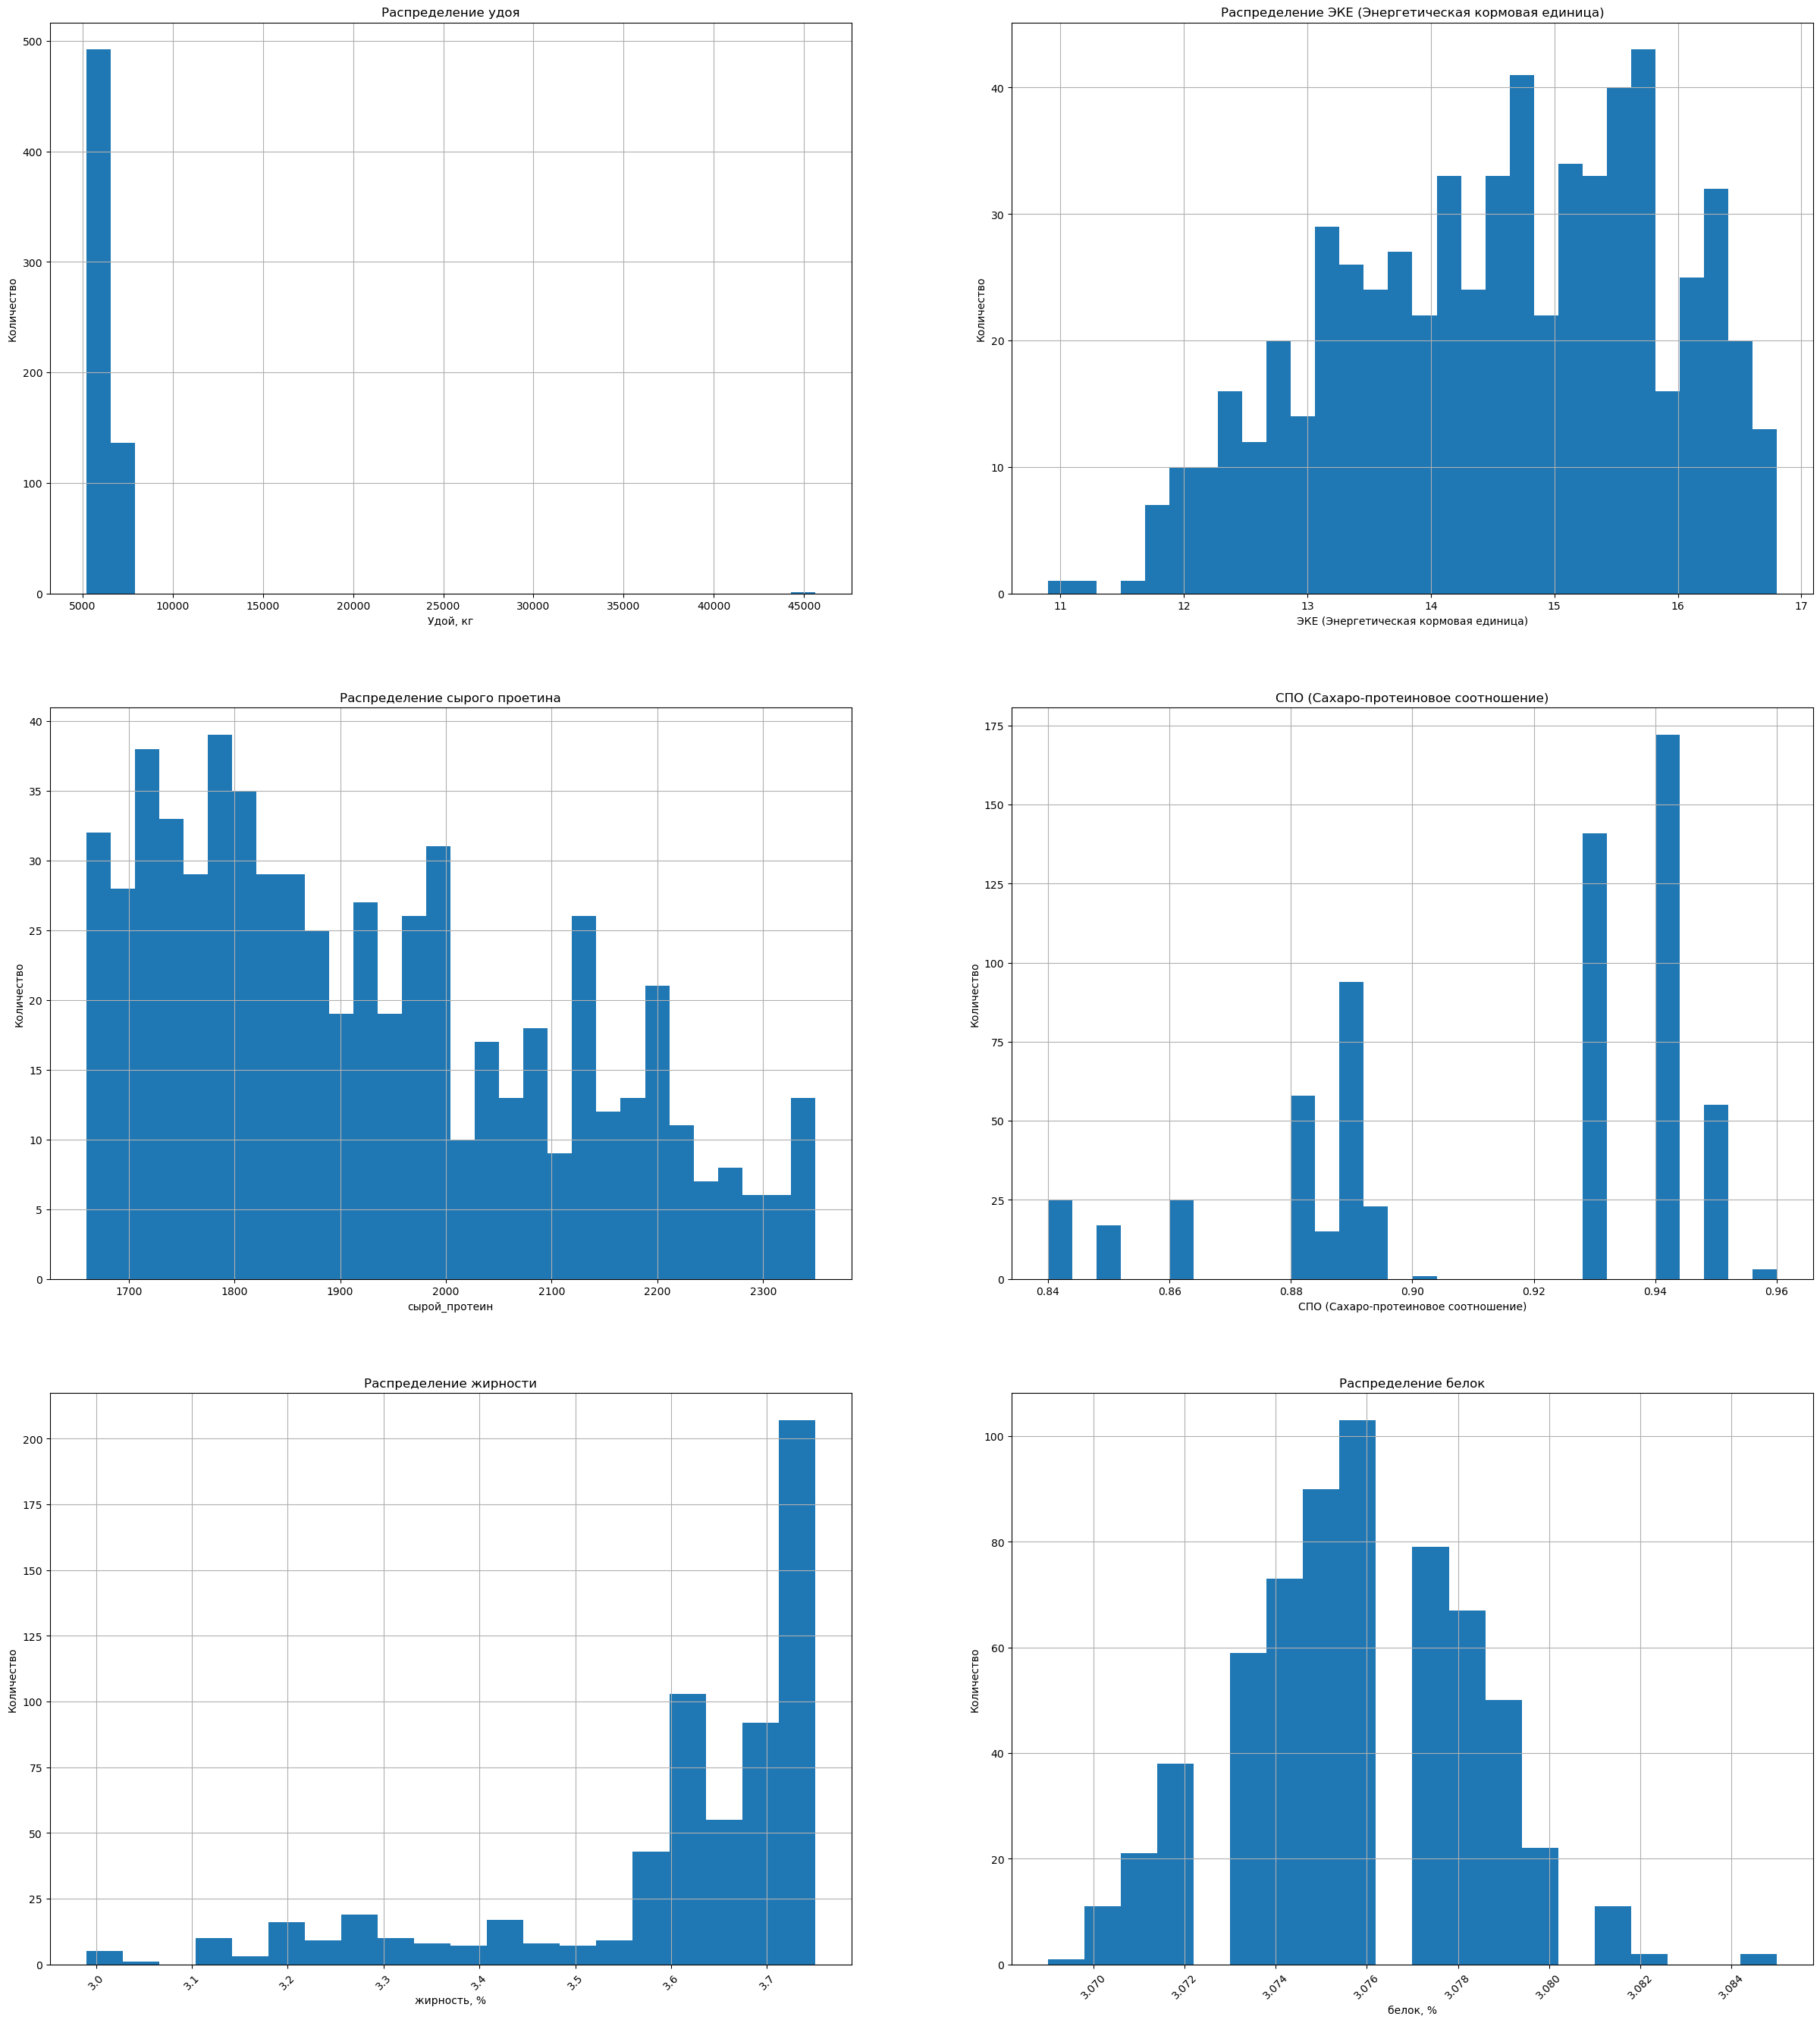

In [108]:
plt.figure(figsize=(30,45))

plt.subplot(4, 2, 1)
df_ferma_main['удой'].hist(bins=30)
plt.title('Распределение удоя')
plt.xlabel('Удой, кг')
plt.ylabel('Количество')

plt.subplot(4, 2, 2) 
df_ferma_main['эке'].hist(bins=30 )
plt.title('Распределение ЭКЕ (Энергетическая кормовая единица)')
plt.xlabel('ЭКЕ (Энергетическая кормовая единица)')
plt.ylabel('Количество')


plt.subplot(4, 2, 3) 
df_ferma_main['сырой_протеин'].hist(bins=30 )
plt.title('Распределение cырого проетина')
plt.xlabel('сырой_протеин')
plt.ylabel('Количество')

plt.subplot(4, 2, 4) 
df_ferma_main['спо'].hist(bins=30 )
plt.title('СПО (Сахаро-протеиновое соотношение)')
plt.xlabel('СПО (Сахаро-протеиновое соотношение)')
plt.ylabel('Количество')

plt.subplot(4, 2, 5) 
df_ferma_main['жирность'].hist(bins=20 )
plt.title('Распределение жирности')
plt.xlabel('жирность, %')
plt.ylabel('Количество')
plt.xticks(rotation=45)


plt.subplot(4, 2, 6) 
df_ferma_main['белок'].hist(bins=20 )
plt.title('Распределение белок')
plt.xlabel('белок, %')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()



__Анализ нормального распредения:__ 
- **Удой** можно видеть аномалии, которые были замечены раньше. После устранения аномалиий проведем анализ на нормальное распределение.
- **ЭКЕ** от 12 до 17
  - Распределение выглядит асимметрично с небольшим уклоном вправо
  - Наблюдаем несколько пиков и впаден (нет формы колокола)
  - Эти признаки говорят о том, что распределение не является нормальным 
- **Сырой протеин** от 1600 до 2350 г 
  - Наблюдаем несколько пиков и впаден (нет формы колокола)
  - Распределение выглядит асеммитрично 
  - Эти признаки говорят о том, что распределение не является нормальным 
- **CПO** 0.84 до 0.96
   - на данном графике наблюдаем кластеры. Несколько пиков указывет на то, что данные могут быть разбиты на группы
   - так же имеется ассиметирия, распределение не является нормальноым
- процент **жирности** от 3% до 3.75% 
   - здесь мы наблюдаем сильную ассиметрию со сдвигом вправо (где расположена большая часть данных)
   - слишком длинный правый хвост 
   - распределение не является нормальным 
- процент **белка** от 3.06% до 3.08% 
  - диаграмма белка выглядит более симметрично и напоминает колокол 
  - распределение выглядит симметрично вокгруг центального значения 
  - хвосты плавно убывают, есть один большой пик в центре 
  - скорее всего можно назвать это распределение приближенное к нормальному 

Для таких признаков как эке, спо, жирность и белок мы можем видеть редкие значения. Рассмотрим их на диаграмме размаха. 

Сделаем анализ удоя по диаграмме размаха и заменим удой на медианное значние по этому признаку. 

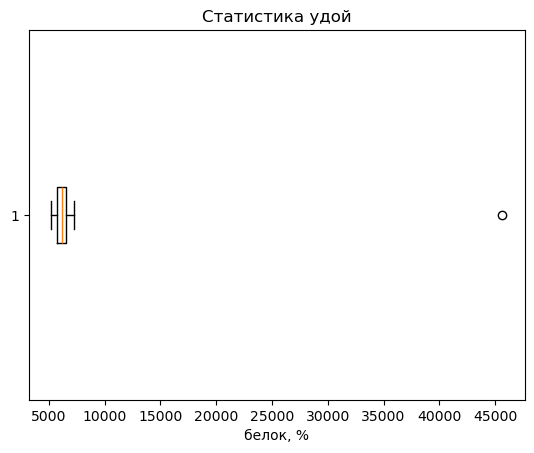

In [112]:
plt.boxplot(df_ferma_main['удой'], vert=False)  
plt.xlabel('белок, %')
plt.title('Cтатистика удой')
plt.show()

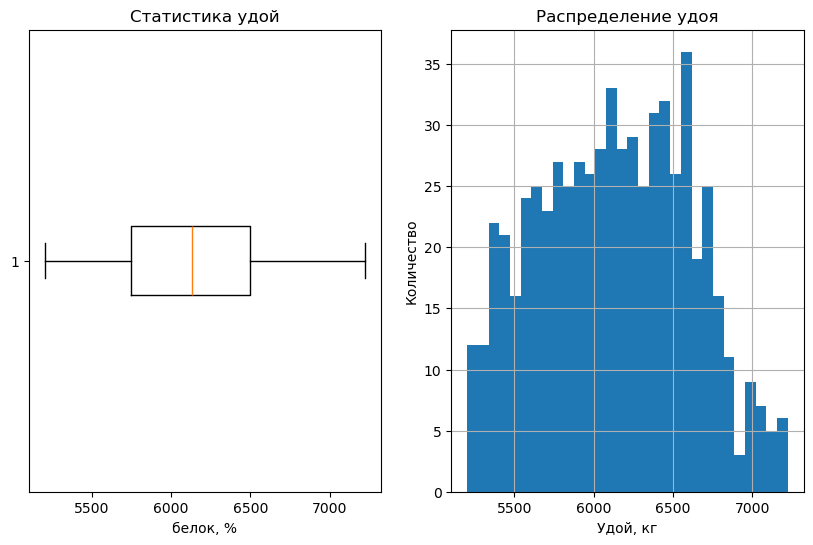

In [114]:
#посчитвам среднее не учитывая аномалии 
mean_value = df_ferma_main[df_ferma_main['удой'] <= 10000]['удой'].mean()
#заменим значения аномалий на среднее по признаку 
df_ferma_main['удой'] = df_ferma_main['удой'].apply(lambda x: mean_value if x > 10000 else x)


plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.boxplot(df_ferma_main['удой'], vert=False)  
plt.xlabel('белок, %')
plt.title('Cтатистика удой')


plt.subplot(1, 2, 2)
df_ferma_main['удой'].hist(bins=30)
plt.title('Распределение удоя')
plt.xlabel('Удой, кг')
plt.ylabel('Количество')
plt.show()

Судя по диаграмме распределение удоя выглядит ближе к симметричному, заметен купол свойственный для нормального распределения.  

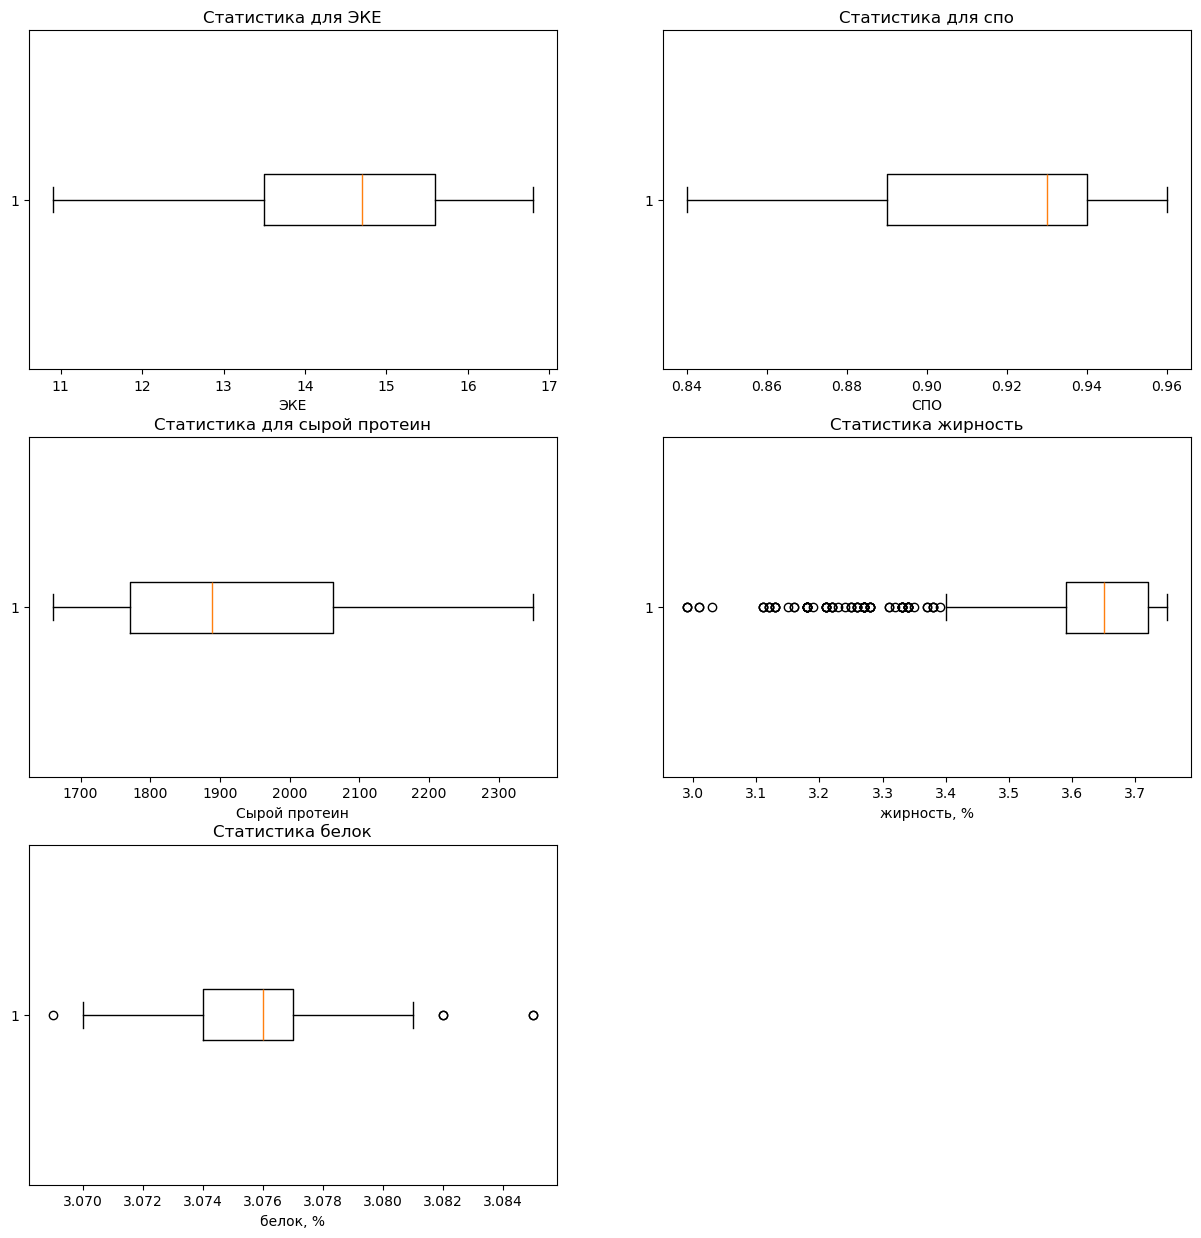

In [117]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.boxplot(df_ferma_main['эке'], vert=False)  
plt.xlabel('ЭКЕ')
plt.title('Cтатистика для ЭКЕ')

plt.subplot(3, 2, 2)
plt.boxplot(df_ferma_main['спо'], vert=False)  
plt.xlabel('СПО')
plt.title('Cтатистика для спо')

plt.subplot(3, 2, 3)
plt.boxplot(df_ferma_main['сырой_протеин'], vert=False)  
plt.xlabel('Сырой протеин')
plt.title('Cтатистика для сырой протеин')

plt.subplot(3, 2, 4)
plt.boxplot(df_ferma_main['жирность'], vert=False)  
plt.xlabel('жирность, %')
plt.title('Cтатистика жирность')

plt.subplot(3, 2, 5)
plt.boxplot(df_ferma_main['белок'], vert=False)  
plt.xlabel('белок, %')
plt.title('Cтатистика белок')


plt.show()

По статистике уровня белка и жира можем видеть выбросы. Для жирности больше 3.4%, белок меньше 3.07% и больше 3.08%.

Далее рассмотрим категориальные признаки.

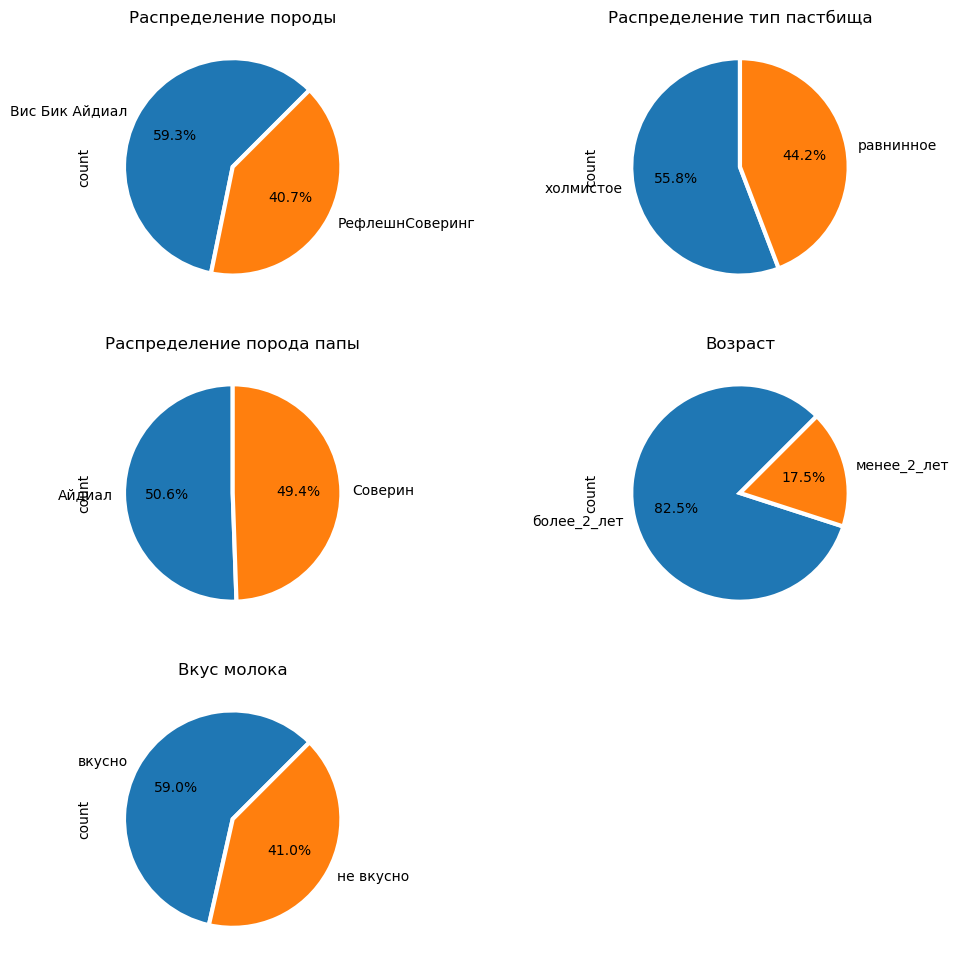

In [121]:
columns = [
    ('порода', 'Распределение породы', 45),
    ('тип_пастбища', 'Распределение тип пастбища', 90),
    ('порода_папы', 'Распределение порода папы', 90),
    ('возраст', 'Возраст', 45),
    ('вкус_молока', 'Вкус молока', 45)
]

plt.figure(figsize=(12, 12))

for i, (column, title, angle) in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    data = df_ferma_main[column].value_counts()
    data.plot(kind='pie', autopct='%1.1f%%', startangle=angle, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
    plt.title(title)

plt.show()

Породы распределились не небольшим перевесом у Вис Бик Айдиал, тип местности чаще холмистый, а породы пап распределены почти по ровну. 
Около 82% коров старше 2 лет, фермер рассматривает около 60% молока как вкусное 

### Анализ df_cow_buy и df_ferma_dad

In [125]:
df_cow_buy.describe()

,текущая_жирность,текущий_уровень_белок
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


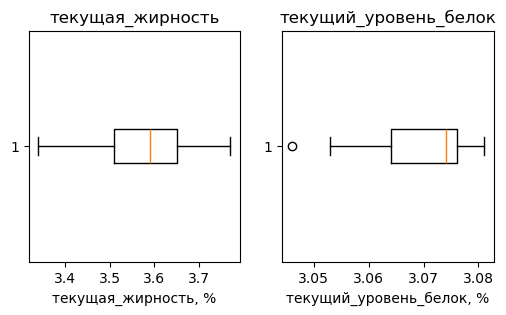

In [127]:
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.boxplot(df_cow_buy['текущая_жирность'], vert = False)  
plt.xlabel('текущая_жирность, %')
plt.title('текущая_жирность')

plt.subplot(1, 2, 2)
plt.boxplot(df_cow_buy['текущий_уровень_белок'], vert = False)  
plt.xlabel('текущий_уровень_белок, %')
plt.title('текущий_уровень_белок')
plt.show()

Диапазон текущей жирности лежит между 3.34% и 3.77%, белка между 3.04% и 3.08%
Выбросов не наблюдается

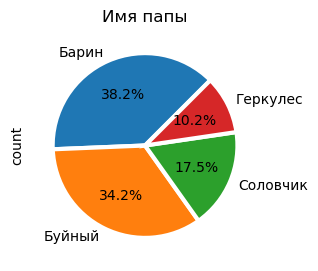

In [130]:
plt.figure(figsize=(3, 3))

age = df_ferma_dad['имя_папы'].value_counts()
age.plot(kind='pie', autopct='%1.1f%%', startangle=45, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white'})
plt.title('Имя папы')
plt.show()

Чаще всего папу зовут Барин и Буйный 

## Корреляционный анализ

В данной части мы проведем корреляционный анализ датафрейма df_ferma_main.

### Коофиценты корреляции

Начнем с изучения взаимодействия между признаками. Построим матрицу корреляций между признаками. 

In [137]:
data_corr = df_ferma_main[['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок' ]].corr()
data_corr

,удой,эке,сырой_протеин,спо,жирность,белок
удой,1.000000,0.761778,0.446074,0.806162,0.598417,0.002966
эке,0.761778,1.000000,0.390669,0.743646,0.640344,-0.009380
сырой_протеин,0.446074,0.390669,1.000000,0.444443,0.360715,0.226185
спо,0.806162,0.743646,0.444443,1.000000,0.624457,0.073809
жирность,0.598417,0.640344,0.360715,0.624457,1.000000,-0.026901
белок,0.002966,-0.009380,0.226185,0.073809,-0.026901,1.000000


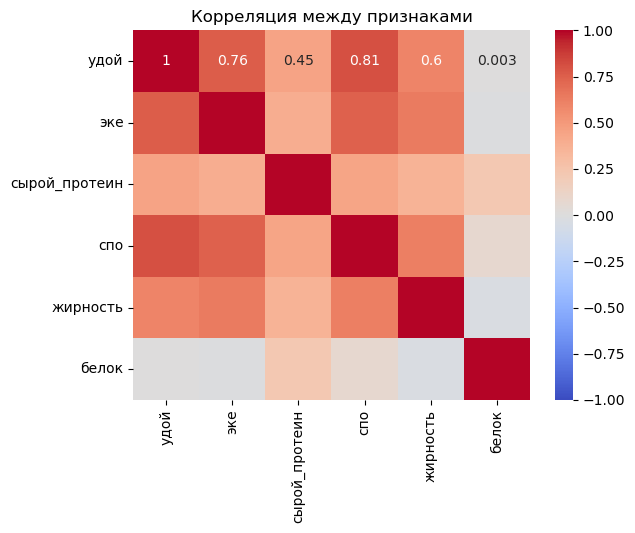

In [139]:
sns.heatmap(data_corr, annot=True, cmap='coolwarm', vmin=-1)
plt.title('Корреляция между признаками')
plt.show()

__Вывод:__ 
- Между Удой и СПО высоквая корреляция 0.81
- Также между Удой и ЭКЕ 0.76

- Между СПО и ЭКЕ корреляция 0.74
- Так же между ЭКЕ и жирностью 0.64
- И между СПО и жирностью  0.62

Будем считать, что есть корреляция выше 0.9, мы имеем мультиколлинеарность. 
Такой ситуации не обнаружено.

### Диаграмма рассеивания для признака Удой и всех колличественных признаков 

#### Удой и ЭКЕ

In [144]:
df_ferma_main.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
0,1,5863.0,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529.0,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810.0,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895.0,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302.0,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


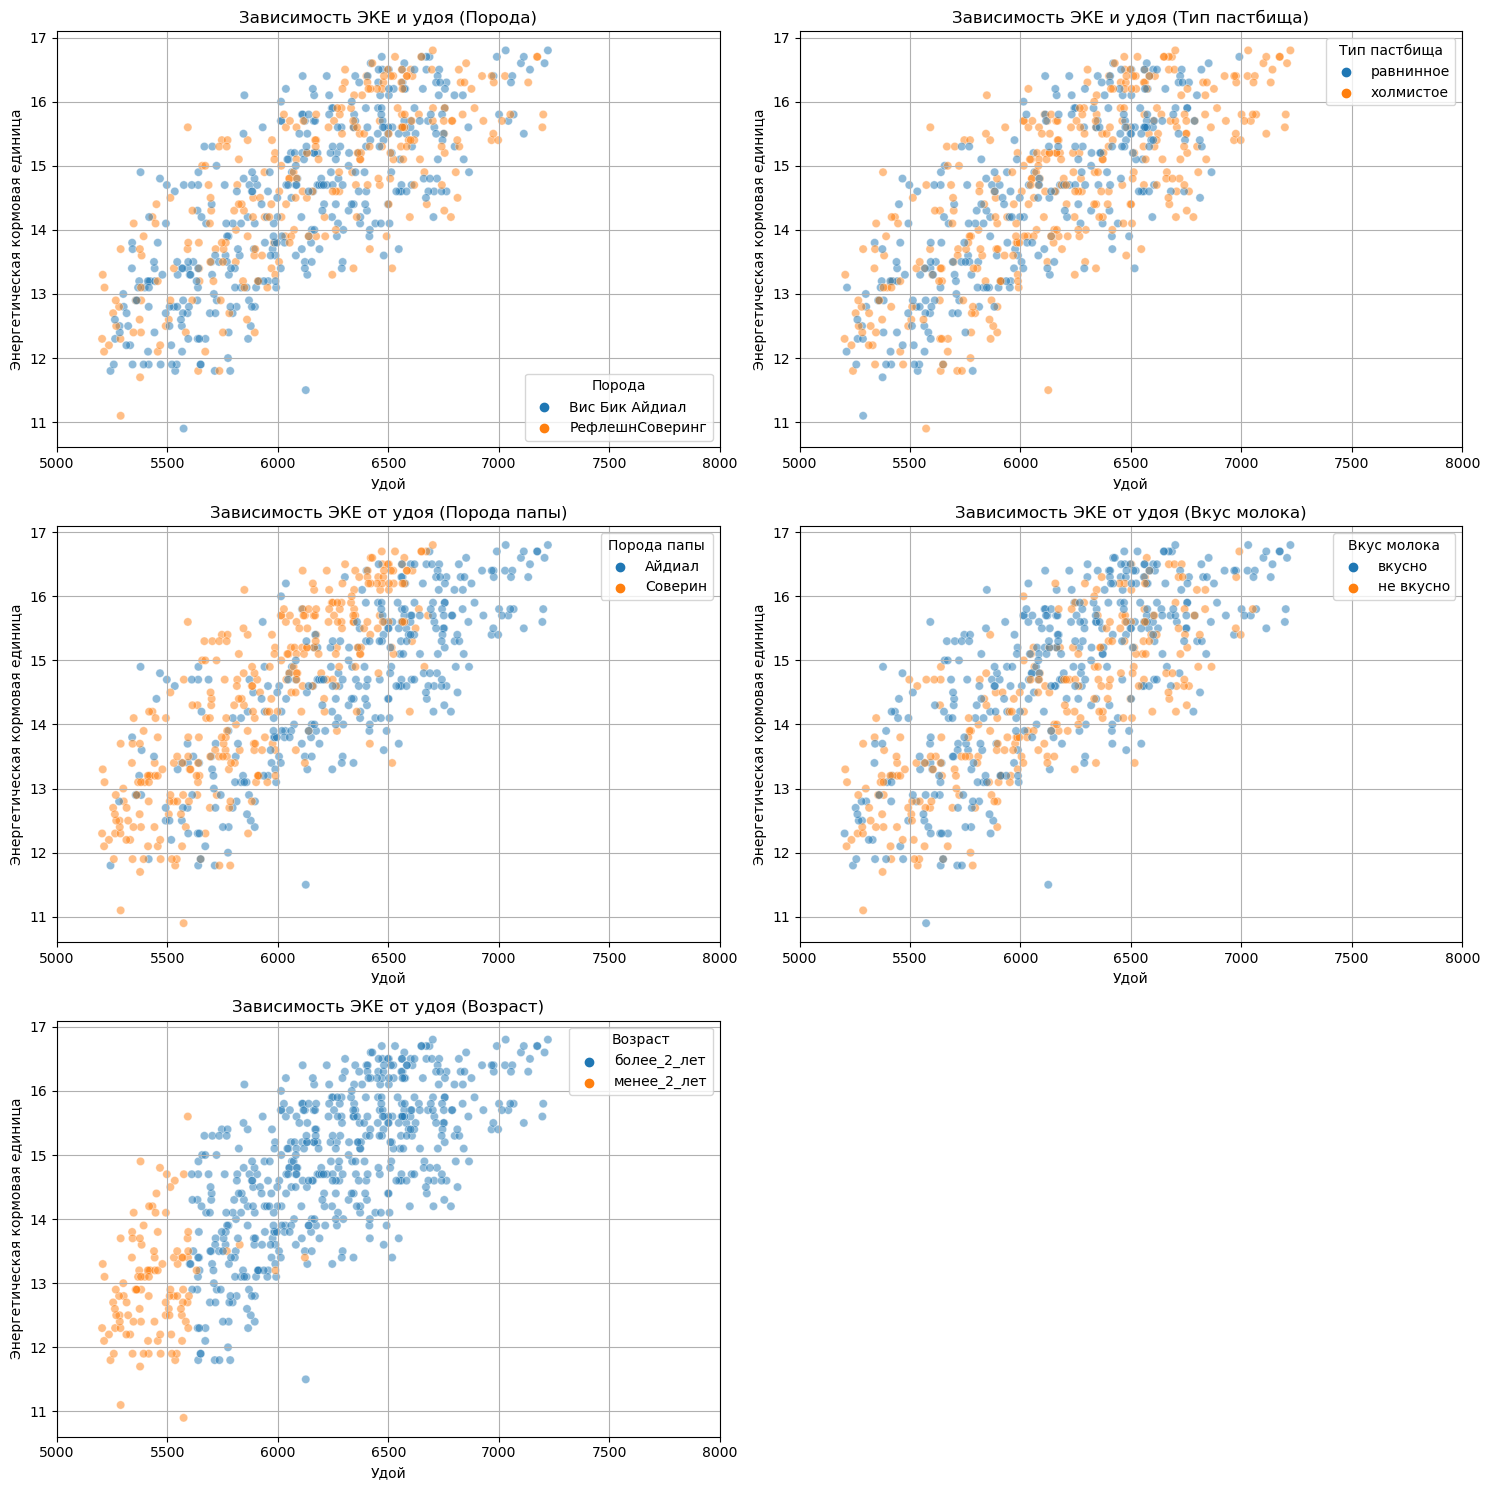

In [146]:
hues = ["порода", "тип_пастбища", "порода_папы", "вкус_молока", "возраст"]
titles = [
    "Зависимость ЭКЕ и удоя (Порода)",
    "Зависимость ЭКЕ и удоя (Тип пастбища)",
    "Зависимость ЭКЕ от удоя (Порода папы)",
    "Зависимость ЭКЕ от удоя (Вкус молока)",
    "Зависимость ЭКЕ от удоя (Возраст)"
]
legends = ["Порода", "Тип пастбища", "Порода папы", "Вкус молока", "Возраст"]

plt.figure(figsize=(15, 15))


for i, (hue, title, legend) in enumerate(zip(hues, titles, legends), start=1):
    plt.subplot(3, 2, i)
    plt.grid(True)
    sns.scatterplot(
        data=df_ferma_main,
        x="удой",
        y="эке",
        hue=hue,
        alpha=0.5
    )
    plt.ylabel('Энергетическая кормовая единица')
    plt.xlabel('Удой')
    plt.title(title)
    plt.xlim(5000, 8000)
    plt.legend(title=legend)

plt.tight_layout()
plt.show()

__Вывод:__ 
- Между ЭКЕ и удоем может наблюдать что-то среднее между линейной и квадратичной зависимостью. Кривая похожа на ветвь паработы - графика квадратичной функции.
- По категориям порода,тип пастбища и вкус молока при росте удоя увеличивается и ЭКЕ.Данные в категориях рапспределены почти по ровну, что также видно на графике по количеству оранжевых и синих точек
- Немного другую картину можно наблюдать для возраста и породы папы. Породы папы хотя и представляет 50 на 50, видно что Айдиал порода больше подвержена влянию ЭКЕ и как следствие росту удоя. А у Соверин породы меньше, но тоже линейно 
- Возраст - видно, что много коров старше 2 лет, и их удои и ЭКЕ намного выше, чем у младших коров. Можно предположить, что маленькие корове не так много едят, и как следствие не дают столько удоя.

#### Удой и сырой протеин 

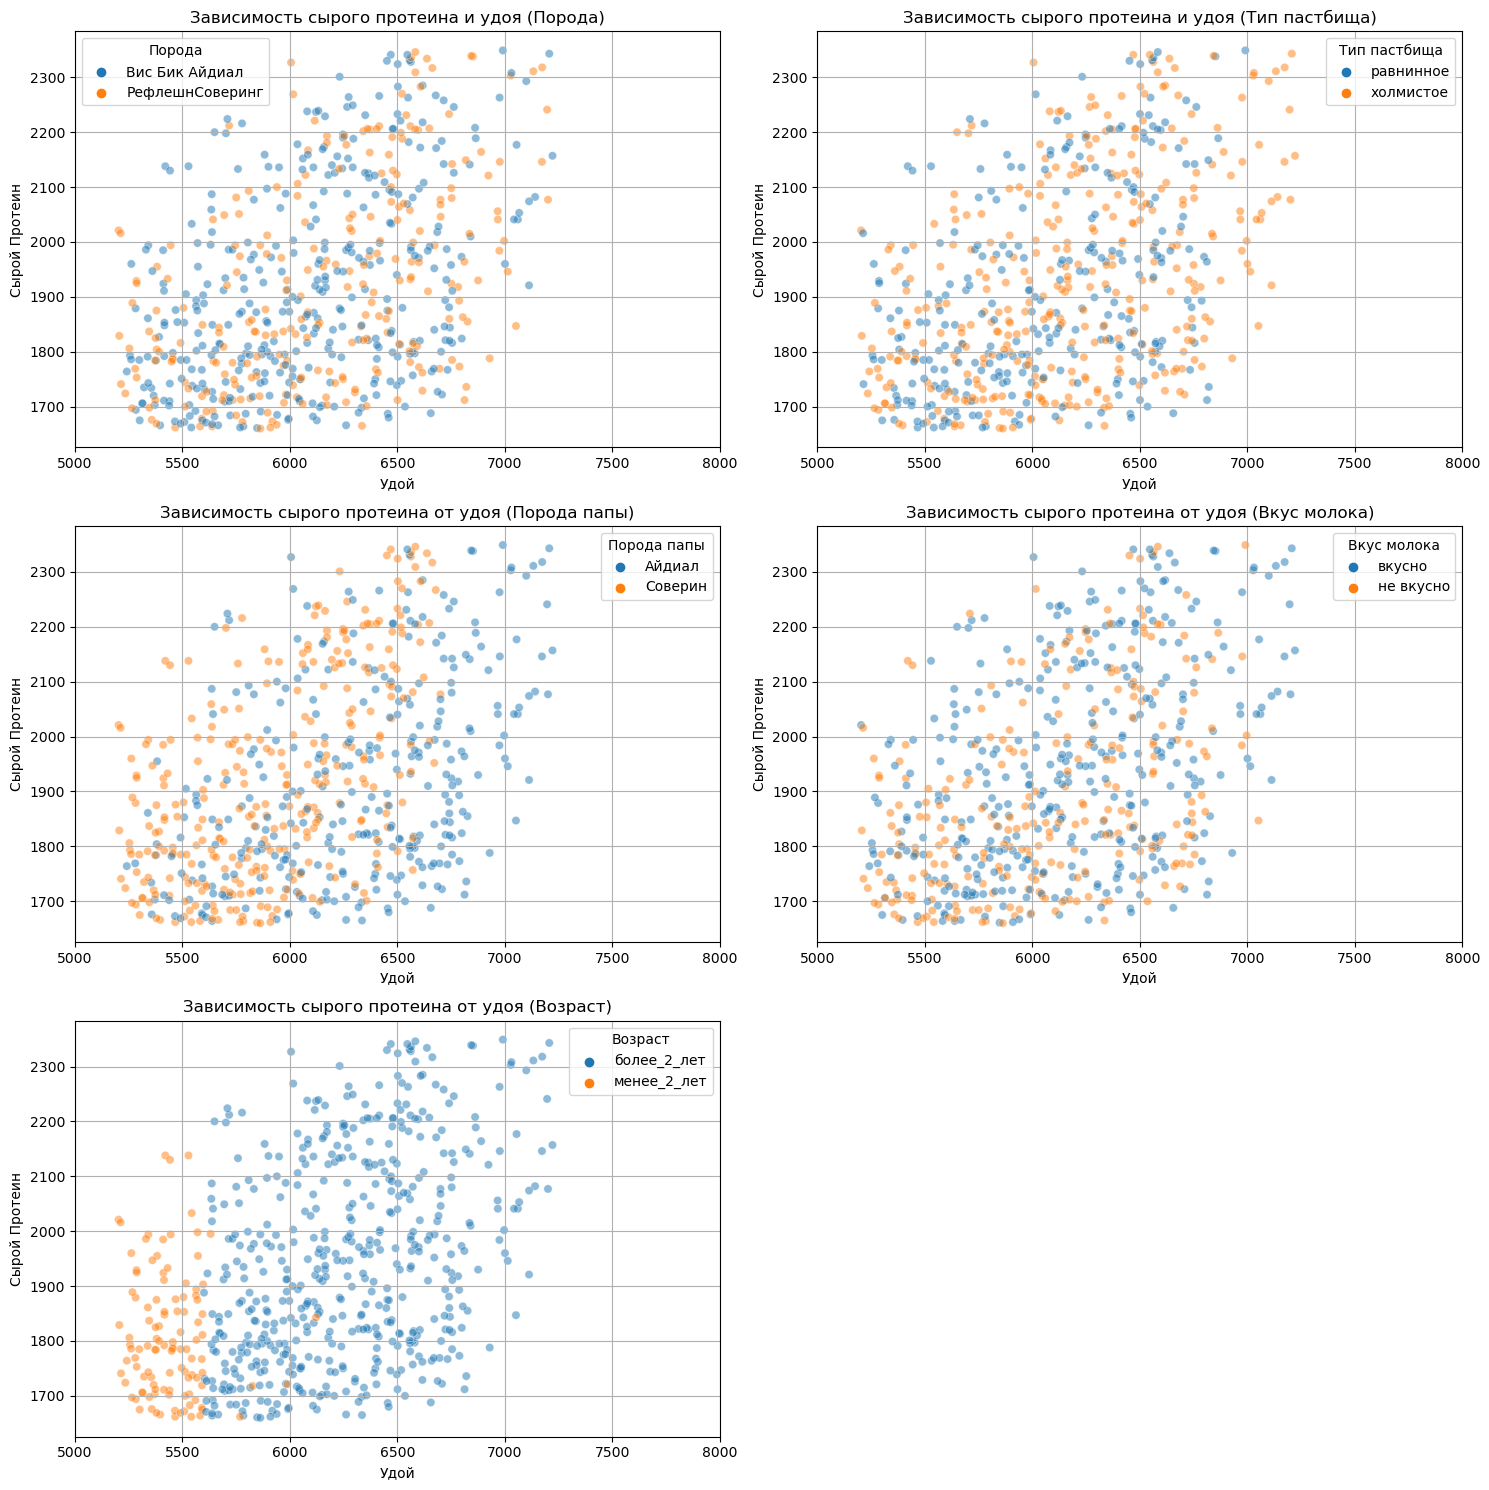

In [150]:
hues = ["порода", "тип_пастбища", "порода_папы", "вкус_молока", "возраст"]
titles = [
    "Зависимость cырого протеина и удоя (Порода)",
    "Зависимость cырого протеина и удоя (Тип пастбища)",
    "Зависимость cырого протеина от удоя (Порода папы)",
    "Зависимость cырого протеина от удоя (Вкус молока)",
    "Зависимость cырого протеина от удоя (Возраст)"
]
legends = ["Порода", "Тип пастбища", "Порода папы", "Вкус молока", "Возраст"]

plt.figure(figsize=(15, 15))


for i, (hue, title, legend) in enumerate(zip(hues, titles, legends), start=1):
    plt.subplot(3, 2, i)
    plt.grid(True)
    sns.scatterplot(
        data=df_ferma_main,
        x="удой",
        y="сырой_протеин",
        hue=hue,
        alpha=0.5
    )
    plt.ylabel('Сырой Протеин')
    plt.xlabel('Удой')
    plt.title(title)
    plt.xlim(5000, 8000)
    plt.legend(title=legend)

plt.tight_layout()
plt.show()

__Вывод:__ 
- Между сырым протином и удоем может наблюдать слабую линейную зависимость. 
- Точки находятся в большой дисперсии
- По категориям порода,тип пастбища и вкус молока при росте удоя можно видеть равномерную небольшую зависимость.Данные в категориях распределены почти поровну, что также видно на графике по количеству оранжевых и синих точек
- Немного другую картину как и ЭКЕ можно наблюдать для возраста и породы папы. Породы папы хотя и представляет 50 на 50, видно что Айдиал порода больше получает сырого протеина в корме  и как следствие росту удоя. А у Соверин породы меньше. 
- Возраст - видно, что много коров старше 2 лет, и их удои и доля сырого протеина в корме намного выше, чем у младших коров. Можно предположить, что маленькие корове не так много едят, и как следствие не дают столько удоя.

#### Удой и СПО 

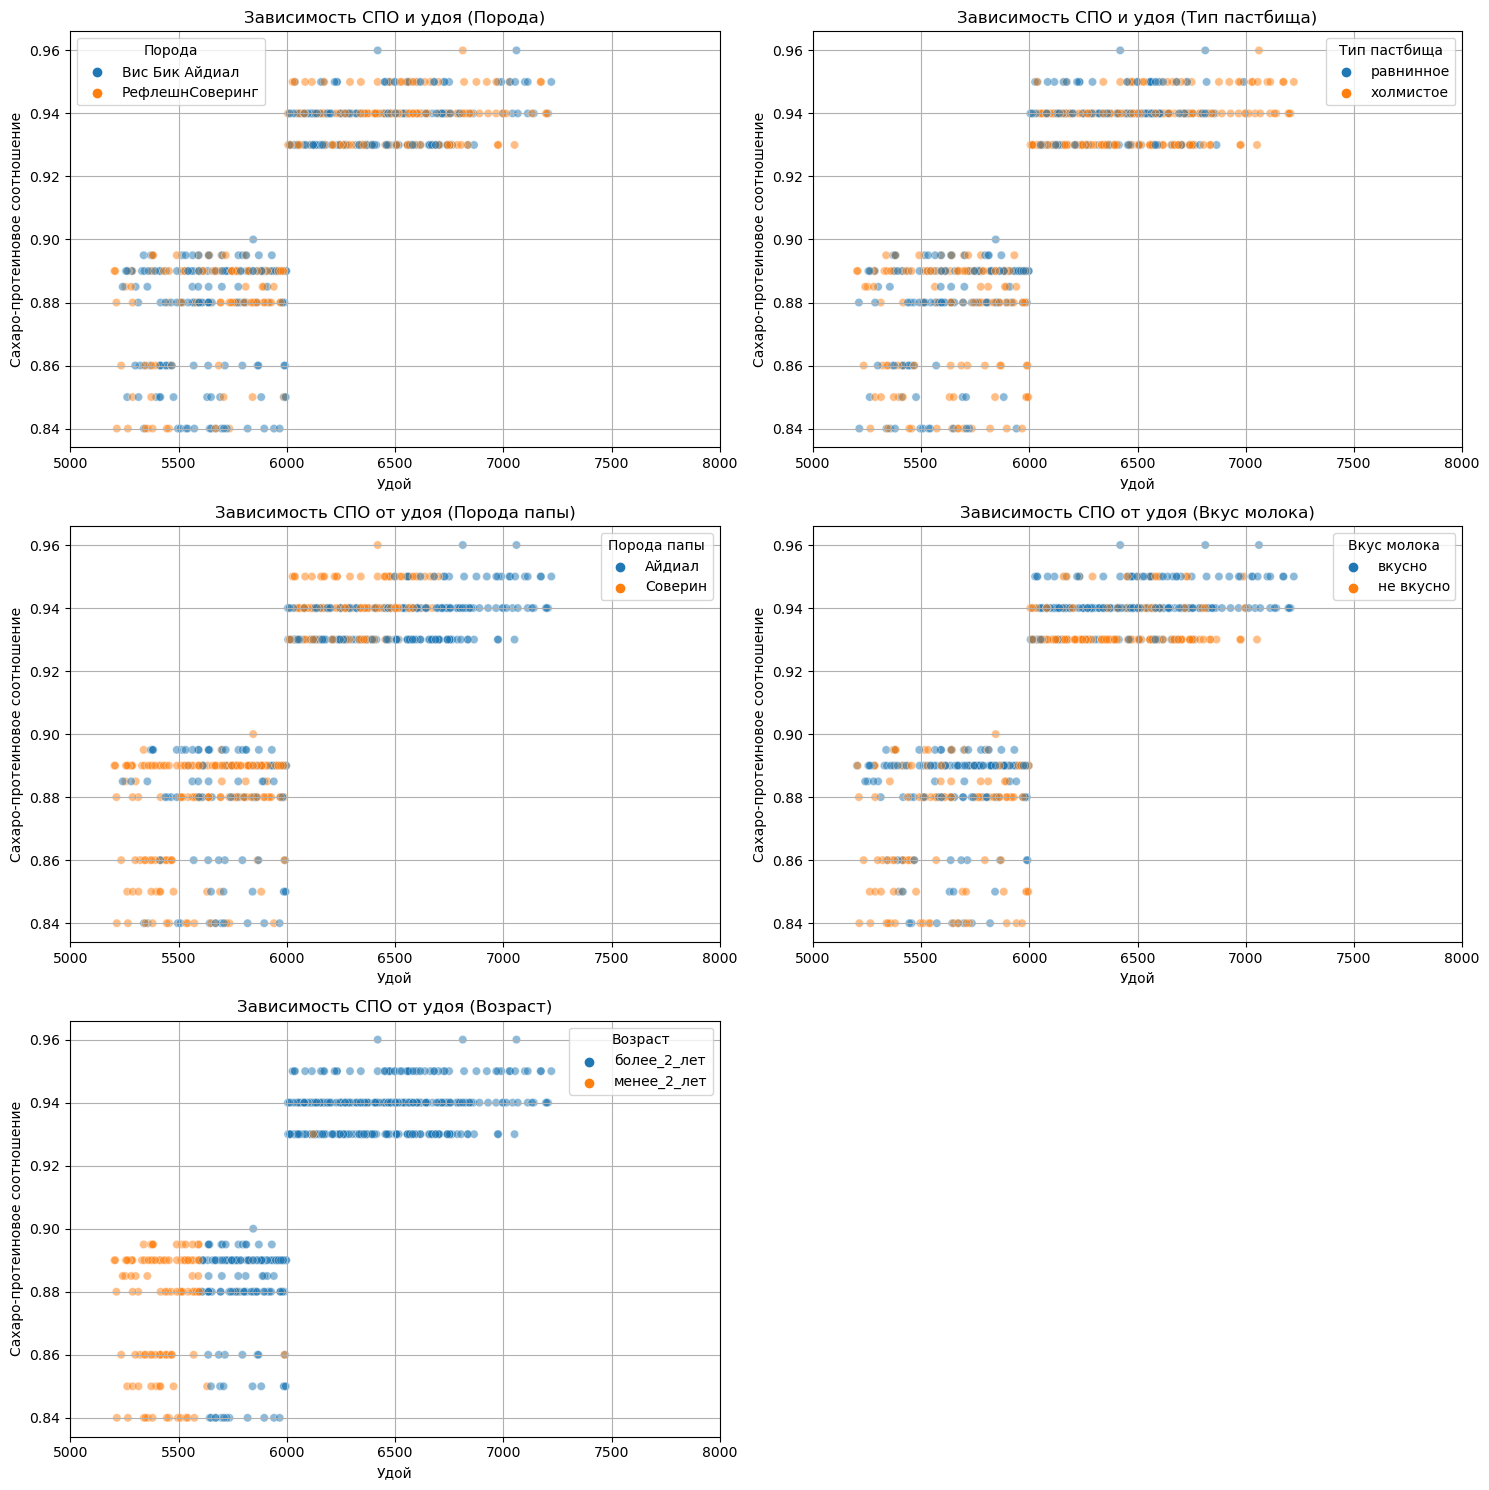

In [154]:
hues = ["порода", "тип_пастбища", "порода_папы", "вкус_молока", "возраст"]
titles = [
    "Зависимость СПО и удоя (Порода)",
    "Зависимость СПО и удоя (Тип пастбища)",
    "Зависимость СПО от удоя (Порода папы)",
    "Зависимость СПО от удоя (Вкус молока)",
    "Зависимость СПО от удоя (Возраст)"
]
legends = ["Порода", "Тип пастбища", "Порода папы", "Вкус молока", "Возраст"]

plt.figure(figsize=(15, 15))


for i, (hue, title, legend) in enumerate(zip(hues, titles, legends), start=1):
    plt.subplot(3, 2, i)
    plt.grid(True)
    sns.scatterplot(
        data=df_ferma_main,
        x="удой",
        y="спо",
        hue=hue,
        alpha=0.5
    )
    plt.ylabel('Сахаро-протеиновое соотношение')
    plt.xlabel('Удой')
    plt.title(title)
    plt.xlim(5000, 8000)
    plt.legend(title=legend)

plt.tight_layout()
plt.show()

__Вывод:__ 
- Между CПО и удоем может наблюдать зависимость при всех категориальных признаках. 
- В данном случае данные разделились на кластеры от 0.86 до 0.96 процентов. Поэтому графики отличаются от прыдыдущих и уже не представляет линейную зависимость
- По категориям порода,тип пастбища и вкус молока при росте удоя можно видеть небольшую зависимость.Данные в категориях распределены почти по ровну, что также видно на графике по количеству оранжевых и синих точек
- Немного другую картину можно наблюдать для возраста и породы папы. Породы папы хотя и представляет 50 на 50, видно что Айдиал порода больше потребляет корм со СПО и как следствие удой больше. А у Соверин породы меньше. 
- Возраст - видно, что много коров старше 2 лет, и их удои и доля СПО в корме намного выше, чем у младших коров. Можно предположить, что маленькие корове не так много едят, и как следствие не дают столько удоя.

#### Удой и жирность молока

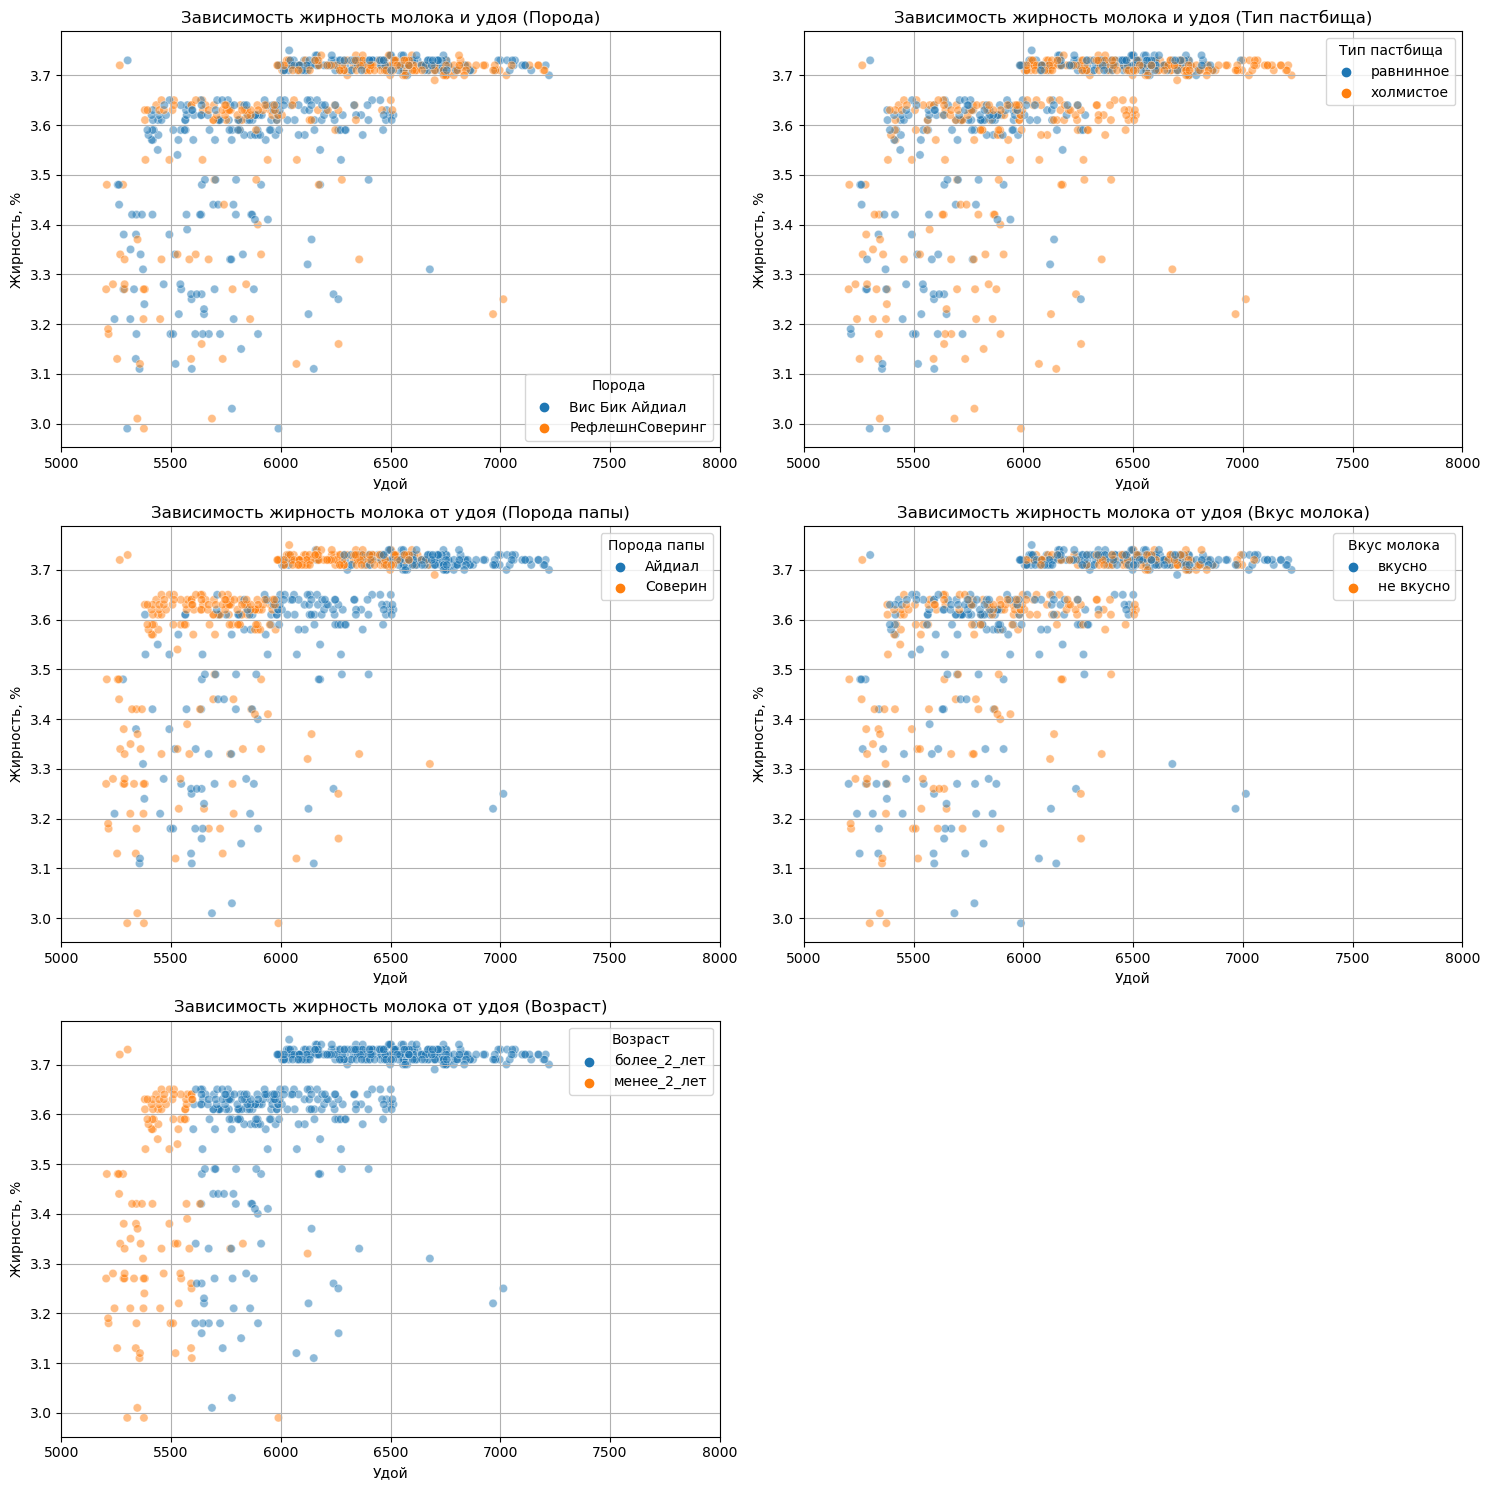

In [158]:
hues = ["порода", "тип_пастбища", "порода_папы", "вкус_молока", "возраст"]
titles = [
    "Зависимость жирность молока и удоя (Порода)",
    "Зависимость жирность молока и удоя (Тип пастбища)",
    "Зависимость жирность молока от удоя (Порода папы)",
    "Зависимость жирность молока от удоя (Вкус молока)",
    "Зависимость жирность молока от удоя (Возраст)"
]
legends = ["Порода", "Тип пастбища", "Порода папы", "Вкус молока", "Возраст"]

plt.figure(figsize=(15, 15))


for i, (hue, title, legend) in enumerate(zip(hues, titles, legends), start=1):
    plt.subplot(3, 2, i)
    plt.grid(True)
    sns.scatterplot(
        data=df_ferma_main,
        x="удой",
        y="жирность",
        hue=hue,
        alpha=0.5
    )
    plt.ylabel('Жирность, %')
    plt.xlabel('Удой')
    plt.title(title)
    plt.xlim(5000, 8000)
    plt.legend(title=legend)

plt.tight_layout()
plt.show()

__Вывод:__ 
- Между жирностью молока и удоем может наблюдать зависимость при всех категориальных признаках, но не носит выраженный линейный характер
- Можно видеть, что основная концентация данных в районе жирности 3.6%-3.8%. 
- Так же видно, что удой от 5500кг до 6500кг имеет жирность около 3.6%, а от 6000 кг до 7200кг 3.8%
- По категориям порода,тип пастбища и вкус молока данные в категориях распределены почти по ровну, что также видно на графике по количеству оранжевых и синих точек
- Немного другую картину можно наблюдать для возраста и породы папы. Породы папы хотя и представляет 50 на 50, видно что Айдиал порода при больших удоях имеет более высокую жирность, чем Соверин. 
- Возраст - видно, что много коров старше 2 лет, и их жирность молока и удои больше, чем у младших коров. Можно предположить, что маленькие коровы пока еще не могут давать много удоев и жирность их молока низкая

#### Удой и белок в молоке

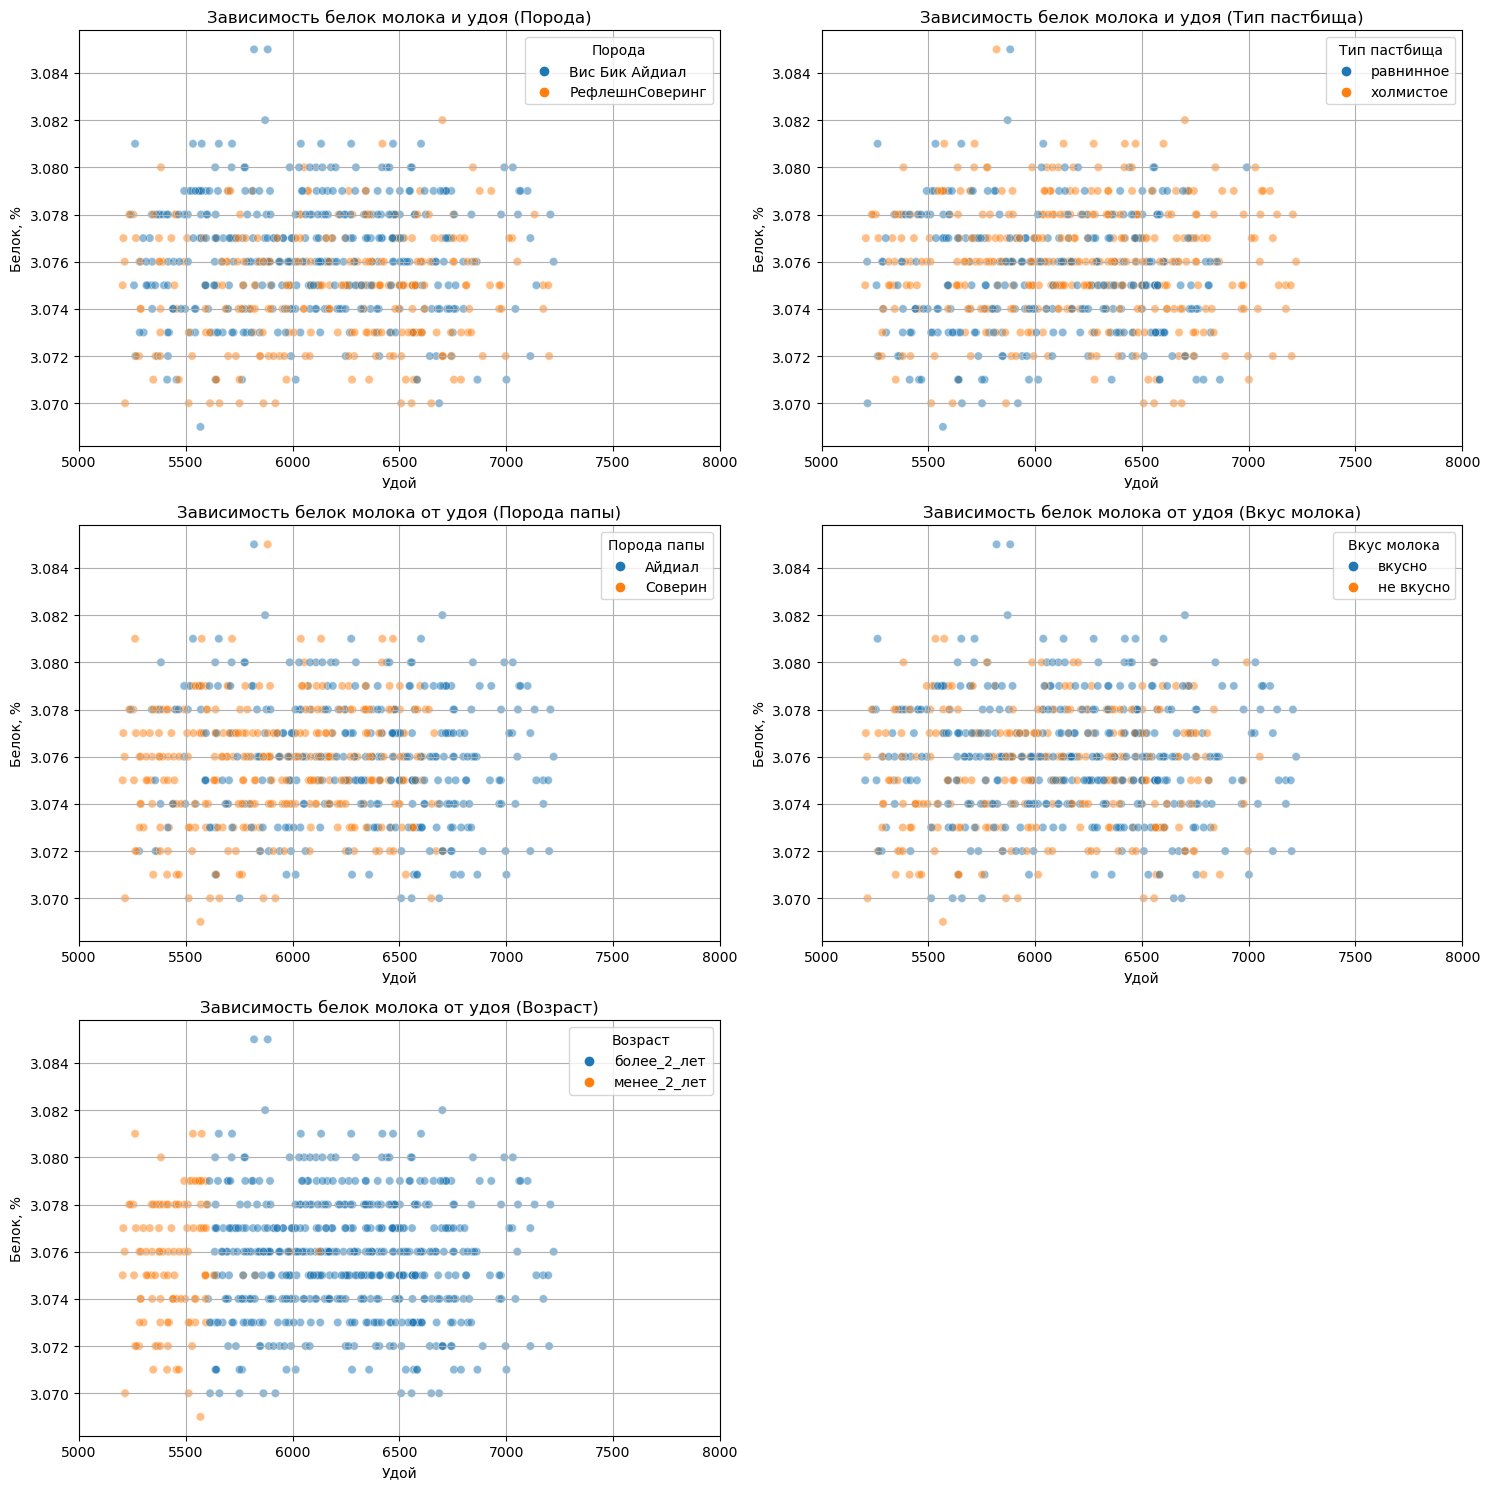

In [162]:
hues = ["порода", "тип_пастбища", "порода_папы", "вкус_молока", "возраст"]
titles = [
    "Зависимость белок молока и удоя (Порода)",
    "Зависимость белок молока и удоя (Тип пастбища)",
    "Зависимость белок молока от удоя (Порода папы)",
    "Зависимость белок молока от удоя (Вкус молока)",
    "Зависимость белок молока от удоя (Возраст)"
]
legends = ["Порода", "Тип пастбища", "Порода папы", "Вкус молока", "Возраст"]

plt.figure(figsize=(15, 15))


for i, (hue, title, legend) in enumerate(zip(hues, titles, legends), start=1):
    plt.subplot(3, 2, i)
    plt.grid(True)
    sns.scatterplot(
        data=df_ferma_main,
        x="удой",
        y="белок",
        hue=hue,
        alpha=0.5
    )
    plt.ylabel('Белок, %')
    plt.xlabel('Удой')
    plt.title(title)
    plt.xlim(5000, 8000)
    plt.legend(title=legend)

plt.tight_layout()
plt.show()

Вывод:

- Между белком молока и удоем может практически нет зависимости при всех категориальных признаках, поэтому и линейной зависимости нет
- Можно видеть, что основная концентация данных в районе жирности 3.06%-3.08% и поделены на кластеры
- По категориям порода,тип пастбища и вкус молока данные в категориях распределены почти по ровну, что также видно на графике по количеству оранжевых и синих точек
- Немного другую картину можно наблюдать для возраста и породы папы. Породы папы хотя и представляет 50 на 50, видно что Айдиал порода при больших удоях имеет более высокую белка, чем Соверин.
- Возраст - видно, что много коров старше 2 лет, и процент белка в молоке и удои больше, чем у младших коров. Можно предположить, что маленькие коровы пока еще не могут давать много удоев и процент белка в их молоке низкий

Проверим датасет на мультиколлиниарность (значение VIF выше 5 требует внимания, а выше 10 — серьезного рассмотрения изменений в модели.)

In [166]:
quantitative_features = ['удой', 'спо', 'эке', 'жирность', 'белок', 'сырой_протеин']
vif_data = df_ferma_main[quantitative_features]
vif_data = vif_data.assign(const=1)
vif = pd.DataFrame({
    'feature': quantitative_features,
    'VIF': [variance_inflation_factor(vif_data.values, i) for i in range(len(quantitative_features))]})
display(vif)

,feature,VIF
0,удой,3.545331
1,спо,3.462383
2,эке,2.931198
3,жирность,1.885875
4,белок,1.088334
5,сырой_протеин,1.374469


### Общий вывод о взамосвязи признаков

**Линейные и нелинейные взаимосвязи**
- Небольную линейнеую взаимосвязь между удоем и другими коллиечественными признаками можно наблюдать между удоем и протеином 
- в остальных случаях линейная взамосвязь скорее отсутвует 
  - c ЭКЕ - квадратичная зависимость(кривое облако)
  - c CПО - кластерный характер (несколько облаков)
  - c белком, очень слабая зависимость

**Мультиколлинеарность**
- Судя по проверке variance_inflation_factor(VIF) и коофицента Пирсона, в данном датасете мультиколлинеарность не обнаружена

## Обучение модели линейной регрессии

На этом шаге мы обучим три модели линейной регрессии.
**Целевой признак - удой**


### Выбор признаком для обучения модели

***Первая модель***

**Колличественные:** В первую модель возьмем следующие признаки 
- ЭКЕ
- CПО
- Cырой протеин

**Категоральные:** Решение оствить
- Ворзраст
- Породу
- Породу папы
Именно в этих признаках подгруппы меньше всего перекрыватся, это еще видно из части анализ данных, где у нас порода была 60% на 40%, а возраст 17% на 83%. Это может улучшить показания результатов.
Тип пастбища распределен слишком равномерно и перекрывается, а порода папы может биологически повлять на удой.
**Признаки первой модели:'эке','спо','сырой_протеин', 'порода_папы', 'порода', 'возраст'**


***Вторая модель***
 **Устранение нелинейности у ЭКЕ и СПО**
СПО значения нелинейны к удою, и разделены на два кластера с границей 0.92 Создадим новую колонку в df_firma_main, которая будет иметь бинарные значения больше или меньше границы 0.92. Таким образом мы должны устранить нелинейность.
ЭКЕ имеет квадратичную зависимость от удоя, чтобы ее устранить нужно возведем значения ЭКЕ в квадрат. 
**Признаки второй модели: 'эке_квадрат', 'спо_binary','сырой_протеин', 'порода_папы', 'порода', 'возраст'**


***Третья модель***
Добавим новый признак имя папы из датафрейма df_ferma_dad
**Признаки третей модели: 'эке_квадрат', 'спо_binary','сырой_протеин', 'порода_папы', 'порода', 'возраст', 'имя_папы'*



### Построение и анализа моделей:

Здесь мы выполним следующие действия: 

1) разобъем данные на тренировочную и тестовую выборки
2) Закодируем категориальные признаки и масштабируем количественные признаки
3) Обучим модель 
4) Посчитаем предсказание на тестовой выборке
5) Рассчитаем метрику R²,MSE, MAE и RMS
6) проанализирем остатки, построив графики гистограммы и рассеивания

Обучение модели на признаках: ['эке', 'спо', 'сырой_протеин', 'порода_папы', 'порода', 'возраст']


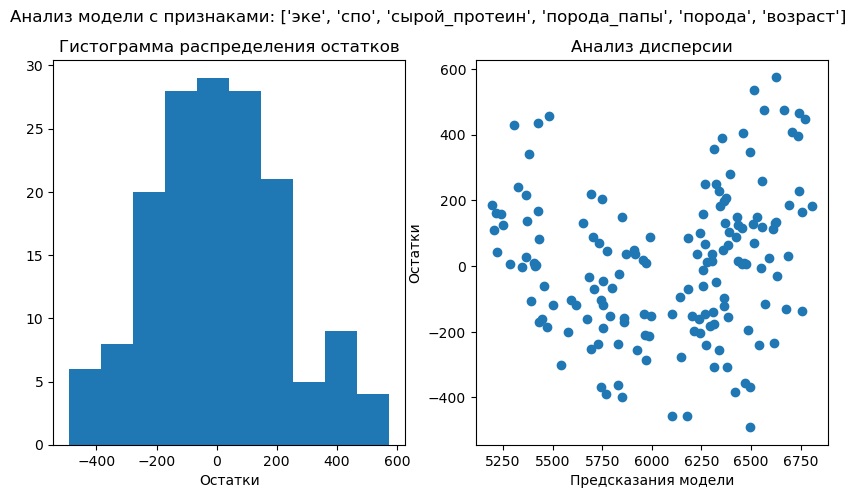

MSE: 49462.23825876771
MAE: 178.12693532206708
RMSE: 222.40107521945058
R2: 0.8194913034288155


Обучение модели на признаках: ['эке_квадрат', 'спо_binary', 'сырой_протеин', 'порода_папы', 'порода', 'возраст']


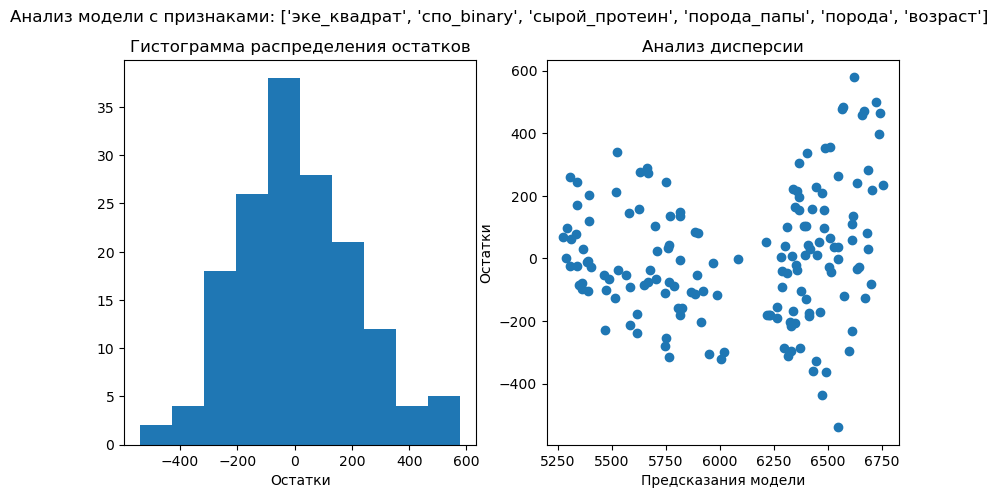

MSE: 42556.91064807003
MAE: 162.3004387251158
RMSE: 206.2932637001752
R2: 0.8446917741370552


Обучение модели на признаках: ['эке_квадрат', 'спо_binary', 'сырой_протеин', 'порода_папы', 'порода', 'возраст', 'имя_папы']


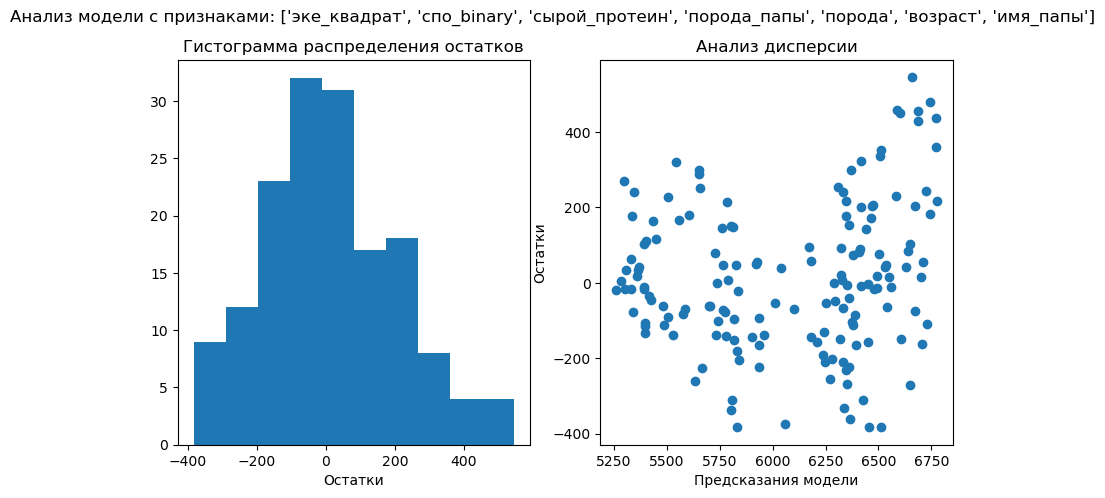

MSE: 37893.0181344111
MAE: 152.9665552437627
RMSE: 194.66129079611872
R2: 0.8617122970293739




,Признаки,MSE,MAE,RMSE,R2
0,"[эке, спо, сырой_протеин, порода_папы, порода,...",49462.238259,178.126935,222.401075,0.819491
1,"[эке_квадрат, спо_binary, сырой_протеин, пород...",42556.910648,162.300439,206.293264,0.844692
2,"[эке_квадрат, спо_binary, сырой_протеин, пород...",37893.018134,152.966555,194.661291,0.861712


In [183]:
# Объединение ferma_dad с ferma_main
df_combined = pd.merge(df_ferma_main, df_ferma_dad, on='id', how='left')

# Создание новых признаков для устранения нелинейности
df_combined['эке_квадрат'] = df_combined['эке'] ** 2
threshold = 0.92
df_combined['спо_binary'] = df_combined['спо'].apply(lambda x: 1 if x > threshold else 0)

# Создание константы RANDOM_STATE
RANDOM_STATE = 42

# Признаки для анализа первой, второй и третей модели 
features_list = [
    ['эке', 'спо', 'сырой_протеин', 'порода_папы', 'порода', 'возраст'],
    ['эке_квадрат', 'спо_binary', 'сырой_протеин', 'порода_папы', 'порода', 'возраст'],
    ['эке_квадрат', 'спо_binary', 'сырой_протеин', 'порода_папы', 'порода', 'возраст', 'имя_папы']
]

# Целевой признак
y = df_combined['удой']

results = []
#инициализация переменных дла расчета квантилий
third_set_y_train = None
third_set_predictions = None

#инициализация переменных для предсказания удоя в cow_buy
third_set_model = None
third_set_encoder = None
third_set_scaler = None


for col_name in features_list:
    print(f"Обучение модели на признаках: {col_name}")

    # Разделение данных на входные признаки и целевой признак
    X = df_combined[col_name]

    # Разделение данных на тренировочные и тестовые, с фиксированным random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

    # Определение категориальных и количественных признаков в зависимости от наличия столбцов
    cat_col_names = [col for col in ['порода_папы', 'порода', 'возраст', 'имя_папы'] if col in col_name]
    num_col_names = [col for col in ['эке', 'сырой_протеин', 'эке_квадрат','спо', 'спо_binary'] if col in col_name]

    # OneHotEncoder для категориальных признаков
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    if cat_col_names:
        X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
        X_test_ohe = encoder.transform(X_test[cat_col_names])
        encoder_col_names = encoder.get_feature_names_out(cat_col_names)
    else:
        X_train_ohe = np.empty((X_train.shape[0], 0))
        X_test_ohe = np.empty((X_test.shape[0], 0))
        encoder_col_names = []

    # StandardScaler для количественных признаков
    scaler = StandardScaler()
    if num_col_names:
        X_train_scaled = scaler.fit_transform(X_train[num_col_names])
        X_test_scaled = scaler.transform(X_test[num_col_names])
    else:
        X_train_scaled = np.empty((X_train.shape[0], 0))
        X_test_scaled = np.empty((X_test.shape[0], 0))

    # Создание DataFrame из закодированных и отмасштабированных данных
    X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=num_col_names)

    # Объединение всех преобразованных данных
    X_train_final = pd.concat([X_train_ohe_df, X_train_scaled_df], axis=1)
    X_test_final = pd.concat([X_test_ohe_df, X_test_scaled_df], axis=1)

    # Инициализация и обучение модели линейной регрессии
    model_lr = LinearRegression()
    model_lr.fit(X_train_final, y_train)

    # Предсказания на тестовых данных
    predictions = model_lr.predict(X_test_final)
    
    #cохраним результаты третей модели 
    if col_name ==  ['эке_квадрат', 'спо_binary', 'сырой_протеин', 'порода_папы', 'порода', 'возраст', 'имя_папы']:
        third_set_y_train = y_train
        third_set_predictions = model_lr.predict(X_train_final)
        third_set_model = model_lr
        third_set_encoder = encoder
        third_set_scaler = scaler

    # Оценка модели
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = model_lr.score(X_test_final, y_test)

    # Сохранение результатов
    results.append({
        'Признаки': col_name, 
        'MSE': mse, 
        'MAE': mae, 
        'RMSE': rmse,
        'R2': r2
    })

    # Расчет остатков
    residuals = y_test - predictions
    
    # Построение графиков
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # Гистограмма распределения остатков
    axes[0].hist(residuals)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    # Диаграмма рассеяния (анализ дисперсии)
    axes[1].scatter(predictions, residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')

    plt.suptitle(f'Анализ модели с признаками: {col_name}')
    plt.show()

    # Вывод результатов
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")
    print("\n")

# Вывод итогов
results_df = pd.DataFrame(results)
display(results_df)

### Анализ метрик и выбор модели

**R2** 
- Лучший коофицент R2 у **третей модели 0.86** больше всего приближен к 1
- Затем модель два с коофицентом 0.84
- первая модель с самым низким коофицентом 0.81

**MSE** и **RMSE** 
Эти метрики говорят нам о том на сколько предсказание модели отличаются от фактических значений. Особенно здесь удобен RMSE так как он показывает отклонение в фактичнской единице - кг. 
- Самый лучший результат у третей модели - 194кг
- чуть хуже у второй - 206 кг 
- самый плохой у первой - 222 кг 

**MAE**
- Самое низкое значение у третей модели 152, значит она лучше предсказывает целевой признак.
- На втором месте вторая 162
- и самое худшее первая модель 178 

**Распределение остатков** 

**Гистограмма** 
- Распределения остатков у всех трех моделей приблеженное к нормальному распределению
- Само распределение немного смещено влево от среднего, значит модель может давать слишком большие предсказания
- При этом гистрограмма второй и третей модели лучше распределены, чем первая. Но тоже имеет небольшое отклонение. 
   
**График рассеяности** 
- Дисперсия непостоянная, и есть паттерны, что говорит что некоторые зависимости между данными
- При этом у второй, и особенно у третей модели дисперсия улучшилась, принимает более постоянное распределение. Но качество не идеальное, все еще заметно два кластера 
   
**Выбор модели** 
- Из трех моделей можно выделить **третью**, как самую качественную. 
- У нее самые лучшие метрики R2,MAE и RMSE
- График гистрограммы имеет приближенное к нормальному распределение
- А так же более постоянная дисперсия, чем у первой и второй модели.


### Расчет доверительного интервала

Доверительный интервал показывает, в каком диапазоне расположатся результаты выборочных наблюдений
Широкий доверительный интервал указывает на то, что оценка неточна; узкий указывает на более точную оценку.

In [188]:
# Рассчитаем остатки и квантили ошибки модели на тренировочных данных для третьего набора признаков
train_residuals = third_set_y_train - third_set_predictions
# Квантили ошибки модели на тренировочных данных
quantiles = np.percentile(train_residuals, [2.5, 97.5])
print(f'2.5% quantile: {quantiles[0]}, 97.5% quantile: {quantiles[1]}')


2.5% quantile: -348.85564382144184, 97.5% quantile: 367.641240686743


Результат показывает, что 97.5% ошибок лежит в диапазоне -348 до 367.
Это достаточно узкий диапозон ошибок (так как у нас удой лежит в диапазоне 5000-7000кг), что говорит о хорошей работе модели в предсказании.


### Расчет прогноза удоя

Добавим значения ЭКЕ,CПО и сырой протеин в df_cow_buy, увеличив на 5%

In [193]:
# Расчет средних значений для признаков эке, спо и сырой_протеин
mean_eke = df_ferma_main['эке'].mean()
mean_spo = df_ferma_main['спо'].mean()
mean_protein = df_ferma_main['сырой_протеин'].mean()

# Увеличение средних значений на 5%
mean_eke_increased = mean_eke * 1.05
mean_spo_increased = mean_spo * 1.05
mean_protein_increased = mean_protein * 1.05

# Добавление увеличенных значений в  df_cow_buy
df_cow_buy['эке'] = mean_eke_increased
df_cow_buy['спо'] = mean_spo_increased
df_cow_buy['сырой_протеин'] = mean_protein_increased

df_cow_buy['эке_квадрат'] = df_cow_buy['эке'] ** 2
df_cow_buy['спо_binary'] = df_cow_buy['спо'].apply(lambda x: 1 if x > threshold else 0)

display(df_cow_buy.head(3))

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_уровень_белок,возраст,эке,спо,сырой_протеин,эке_квадрат,спо_binary
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,0.958772,2019.532273,233.205675,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271073,0.958772,2019.532273,233.205675,1
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271073,0.958772,2019.532273,233.205675,1


In [197]:

# Подготовка данных cow_buy
X_cow_buy_ohe = third_set_encoder.transform(df_cow_buy[cat_col_names])
encoder_col_names = third_set_encoder.get_feature_names_out(cat_col_names)

X_cow_buy_scaled = third_set_scaler.transform(df_cow_buy[num_col_names])

X_cow_buy_ohe_df = pd.DataFrame(X_cow_buy_ohe, columns=encoder_col_names)
X_cow_buy_scaled_df = pd.DataFrame(X_cow_buy_scaled, columns=num_col_names)

X_cow_buy_final = pd.concat([X_cow_buy_ohe_df, X_cow_buy_scaled_df], axis=1)

# Получение прогноза удоя для данных cow_buy
predictions_cow_buy = third_set_model.predict(X_cow_buy_final)

# Добавление прогнозов в DataFrame cow_buy
df_cow_buy['прогноз_удой'] = predictions_cow_buy

display(df_cow_buy.head(3))


,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_уровень_белок,...,эке,спо,сырой_протеин,эке_квадрат,спо_binary,прогноз_удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,...,15.271073,0.958772,2019.532273,233.205675,1,6518.520472
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,...,15.271073,0.958772,2019.532273,233.205675,1,6316.669659
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,...,15.271073,0.958772,2019.532273,233.205675,1,6327.952591


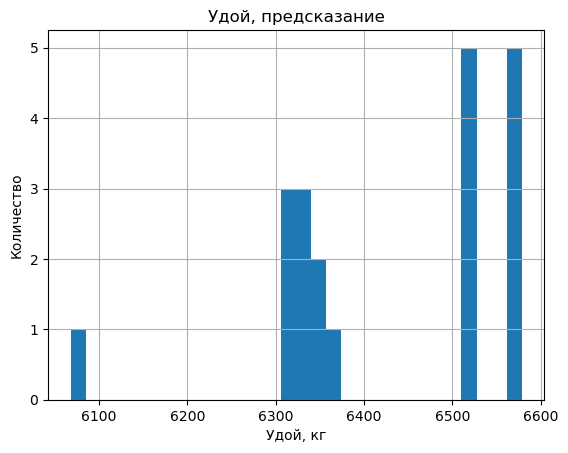

In [201]:
df_cow_buy['прогноз_удой'].hist(bins=30)
plt.title('Удой, предсказание')
plt.xlabel('Удой, кг')
plt.ylabel('Количество')
plt.show()

**Вывод**
Предсказания показывают, что все 20 коров будут давать больше 6000 кг удоя в год

## Обучение модели логистической регрессии

На данном шаге мы обучим данные датасета ferma_main.csv на LogisticRegression. Целевой признак - **вкус молока**

In [205]:
display(df_combined.head(3))

,id,удой,эке,сырой_протеин,спо,порода,...,белок,вкус_молока,возраст,имя_папы,эке_квадрат,спо_binary
0,1,5863.0,14.2,1743,0.890,Вис Бик Айдиал,...,3.076,вкусно,более_2_лет,Буйный,201.64,0
1,2,5529.0,12.8,2138,0.890,Вис Бик Айдиал,...,3.079,вкусно,менее_2_лет,Соловчик,163.84,0
2,3,5810.0,14.0,1854,0.885,РефлешнСоверинг,...,3.074,не вкусно,более_2_лет,Барин,196.00,0


Отфильтруем жирность и белок, чтобы убрать выбросы 

In [208]:
df_filtered = df_combined[(df_combined['жирность'] >= 3.4) & (df_combined['белок'] >= 3.07) & (df_combined['белок'] <= 3.08)]
display(df_combined.head(3))

,id,удой,эке,сырой_протеин,спо,порода,...,белок,вкус_молока,возраст,имя_папы,эке_квадрат,спо_binary
0,1,5863.0,14.2,1743,0.890,Вис Бик Айдиал,...,3.076,вкусно,более_2_лет,Буйный,201.64,0
1,2,5529.0,12.8,2138,0.890,Вис Бик Айдиал,...,3.079,вкусно,менее_2_лет,Соловчик,163.84,0
2,3,5810.0,14.0,1854,0.885,РефлешнСоверинг,...,3.074,не вкусно,более_2_лет,Барин,196.00,0


**Выбор признаков** 
Для логистической реграессии выберем следующие признаки: 
- удой, эке_квадрат, cырой_протеин, спо_binary, жирность, белок 
- порода папы, порода, возраст, имя папы, 

Подготовим данные и обучим модель логистической регрессии 

In [214]:
# Разделяем данные на признаки и целевой признак
X = df_filtered.drop(columns=['id', 'вкус_молока', 'спо', 'эке', 'удой'])
y = df_filtered['вкус_молока']

# Создание константы RANDOM_STATE
RANDOM_STATE = 42

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

num_col_names = [ 'эке_квадрат', 'сырой_протеин', 'жирность', 'белок']
cat_col_names = ['порода', 'порода_папы', 'возраст', 'спо_binary', 'имя_папы', 'тип_пастбища']

# StandardScaler для количественных признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# OneHotEncoder
encoder  = OneHotEncoder(drop='first', sparse_output = False)
X_train_ohe =  encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out(cat_col_names)

# Создание DataFrame из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)


# Объединение всех преобразованных данных
X_train_final = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_final = pd.concat([X_test_ohe, X_test_scaled], axis=1)


# создаём объект для работы с моделью
clf = LogisticRegression()
# настраиваем модель на данные
clf = clf.fit(X_train_final, y_train)

# получаем прогнозные значения
prediction = clf.predict(X_test_final)
y_test_array = np.array(y_test)

### Метрики accuracy, recall, precision.

Рассчитаем accuracy

In [218]:
acc = accuracy_score(y_test, prediction)
print(f'Accuracy: {acc:.2f}')

Accuracy: 0.67


Accuracy показывает,что для 67% объектов модель правильно предсказала класс. 

Рассчитам Recall и Precision 

In [222]:
recall = recall_score(y_test, prediction, pos_label='вкусно')
precision =precision_score(y_test, prediction, pos_label='вкусно')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')


Recall: 0.80
Precision: 0.73


Precision показывает в данном случае, как часто модель смогла предсказать класс 1 (вкусно), и это достаточно хороший показатель.  

А Recall показывает, смогла ли модель присвоить класс 'вкусно' всем объектам этого класса, то есть сколько из позитивных предсказаний были верны. Это означает, что модель хорошо справляется с определнием класса 'вкусно'. 

При этом могут быть проблемы с определением класса 'не вкусно'

### Матрица ошибок 

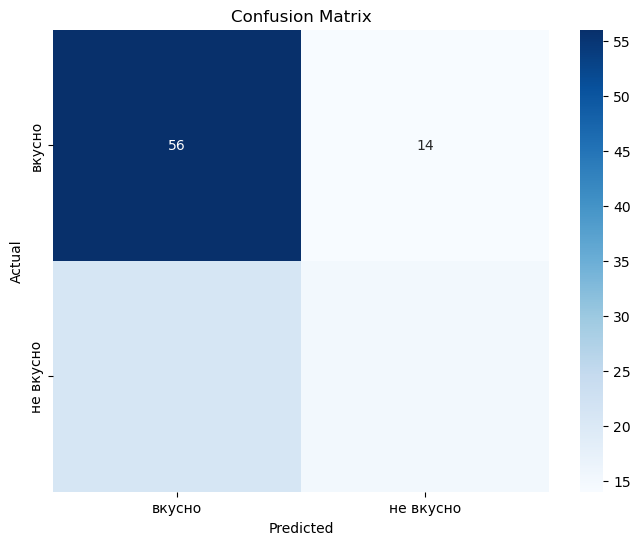

In [226]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_array, prediction, labels=['вкусно', 'не вкусно'])

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['вкусно', 'не вкусно'], columns=['вкусно', 'не вкусно'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Анализ матрицы**
По матрице ошибок можно видеть, что:
- 56 раз предсказывает 'вкусно' правильно 
- 15 раза модель предсказывает 'не вкусно' тоже верно

Анализ FP и FN: 
- 21 раза модель предсказывает ошибочно, что 'ну вкусно', это вкусно (FN)
- 14 раз предсказывает 'вкусно' для 'не вкусно' (FP)


**Вывод**
Модель хорошо предсказывает класс вкусно, по сравнению со вторым. О чем и говорит высокий Recall 0.8

### Анализ модели логистической регрессии

**Ошибка первого рода (False Positive)**, будет происходить, когда модель предсказывает вкусное молоко, а оно на самом деле не вкусное. То есть фермер будет покупать коров, молоко которых не вкусное 

**Второго рода (False Nehative)**, будет наоборот предсказывать не вкусное, когда оно будет вкусным. Таким образом фермер может отказаться от коров, которые дали бы ему вкусное молоко.

В данном случае **первый тип ошибки будет важнее**, потому что не учитывая ее фермер может купить много коров, которые дают не вкусное молоко. 

Поэтому **Precision более важная метрика** в этом контексте. Высокий Precision будет означать, что меньше коров, дающих не вкусное молоко, будет отобрано. Recall тоже важен, чтобы в принципе определить все вкусное молоко, но для фермера важно избежать покупки коров, которые ему не подходят.

Чтобы светси критичную ошибку к нулю, нужно измените порог принадлежности к классам.

In [235]:
y_test_binary = y_test.map({'вкусно': 1, 'не вкусно': 0})

y_proba = clf.predict_proba(X_test_final)[:, 1]
data = pd.DataFrame(zip(y_test_binary, y_proba), columns=['y_valid', 'y_proba']).sort_values(by='y_proba', ascending=False)
print(data.head(4))

    y_valid   y_proba
45        0  0.801189
62        0  0.760380
61        1  0.759630
17        1  0.752283


In [241]:
data = pd.DataFrame({
    'y_valid': [0, 1, 0, 1, 1, 0, 0, 1, 0, 1],  # Actual labels
    'y_proba': np.random.rand(10),  # Example probabilities
})

thresholds = [round(i, 2) for i in np.linspace(0.6, 0.9, num=5, endpoint=False)]
print(thresholds)

# переменные для результата
columns = []
recalls = []
precisions = []
confusion_matrices = []

# добавляем новые данные в зависимости от порога
for i in thresholds:
    column_name = 'y_pred_' + str(i)
    columns.append(column_name)
    data[column_name] = data['y_proba'].apply(lambda y_proba: 1 if y_proba >= i else 0)
    recall = recall_score(data['y_valid'], data[column_name])
    recalls.append(recall)
    precision = precision_score(data['y_valid'], data[column_name], zero_division=0)
    precisions.append(precision)
    cm = confusion_matrix(data['y_valid'], data[column_name])
    confusion_matrices.append(cm)

recall_precision_df = pd.DataFrame({'Threshold': thresholds, 'Recall': recalls, 'Precision': precisions})
print(recall_precision_df)

for idx, threshold in enumerate(thresholds):
    print(f'Confusion Matrix at Threshold {threshold}:')
    print(confusion_matrices[idx])

[0.6, 0.66, 0.72, 0.78, 0.84]
   Threshold  Recall  Precision
0       0.60     0.2        1.0
1       0.66     0.2        1.0
2       0.72     0.2        1.0
3       0.78     0.2        1.0
4       0.84     0.2        1.0
Confusion Matrix at Threshold 0.6:
[[5 0]
 [4 1]]
Confusion Matrix at Threshold 0.66:
[[5 0]
 [4 1]]
Confusion Matrix at Threshold 0.72:
[[5 0]
 [4 1]]
Confusion Matrix at Threshold 0.78:
[[5 0]
 [4 1]]
Confusion Matrix at Threshold 0.84:
[[5 0]
 [4 1]]


Из анализа порога классификации мы видим, чтобы FP были 0 нужно сделать порог около 0.84

### Расчет прогноза вкуса молока

Названия колонок, участвующих в тренировке модели и в целевом датасете должны быть идентичны. Переименуем их в df_cow_buy

In [245]:
df_cow_buy = df_cow_buy.rename(columns={
    'текущая_жирность': 'жирность',
    'текущий_уровень_белок': 'белок', 
})

In [247]:
df_cow_buy.head(3)

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,...,эке,спо,сырой_протеин,эке_квадрат,спо_binary,прогноз_удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,...,15.271073,0.958772,2019.532273,233.205675,1,6518.520472
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,...,15.271073,0.958772,2019.532273,233.205675,1,6316.669659
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,...,15.271073,0.958772,2019.532273,233.205675,1,6327.952591


Обучим модель на df_ferma_main и предскажем вкус молока в df_cow_buy

In [250]:
# Подготовка данных cow_buy
X_cow_buy_ohe = encoder.transform(df_cow_buy[cat_col_names])
encoder_col_names = encoder.get_feature_names(cat_col_names)

X_cow_buy_scaled = scaler.transform(df_cow_buy[num_col_names])

X_cow_buy_ohe_df = pd.DataFrame(X_cow_buy_ohe, columns=encoder_col_names)
X_cow_buy_scaled_df = pd.DataFrame(X_cow_buy_scaled, columns=num_col_names)

X_cow_buy_final = pd.concat([X_cow_buy_ohe_df, X_cow_buy_scaled_df], axis=1)

# Получение прогноза удоя для данных cow_buy
y_proba = clf.predict_proba(X_cow_buy_final)[:, 1]
milk_threshold = (y_proba >= 0.84).astype(int)
df_cow_buy['молоко_прогноз'] = milk_threshold

display(df_cow_buy.head())


AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [71]:
print(df_cow_buy['молоко_прогноз'].value_counts())

0    19
1     1
Name: молоко_прогноз, dtype: int64


## Итоговые выводы

### Рекомендация фермеру 

Отберем коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.

In [74]:
best_cows = df_cow_buy[(df_cow_buy['удой'] >= 6000) & (df_cow_buy['молоко_прогноз'] == 1)]
display(best_cows)

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,...,спо,сырой_протеин,эке_квадрат,спо_binary,удой,молоко_прогноз
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,...,0.958772,2019.532273,233.205675,1,6518.520472,1


<div class="alert alert-warning">
<h2> Комментарий ревьюера 3<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь логично вывести строку с этой коровой.
        
</div> 
  

Фермер рекомендуем купить 1 корову из 20 с минимальными рисками, так как эти коровы дают вкусное молоко и дают больше 6000 кг удоя. 

Корова породы Вис Бик Айдиал, который по результатам модели будет давать вкусное молоко и 6518 кг удоя в год
Для более точного предсказания можно попробовать другие модели, или добвить еще признаков. 


### Линейная и логистическая регрессии

- Для улучшения качества регрессионной модели был сделан анализ на корреляцию, чтобы узнать релевантные признаки (линейные) и исключить мульиколлиниарность.
- Также был применем способ добавить дополнительный признак - это немного улучшило качетво модели 
- В том числе для устранения нелинейности некоторые признакми СПО и ЭКЕ были преобразованы через возведение в квадрат и кластеризацию. 


Были проделаны следующие шаги 
- удаление выбросов, проверка на пропущенные значения
- маштабирование и кодирование данных
- преобразование признаком в линейные 
- исключит мультиколлинарность
- добавление новых признаков

Возможные улучшения - добавление новых признаков.

При анализе рисков или экономических расчётов в задачах классификации, включая логистическую регрессию, важно учитывать следующие метрики:
- accuracy
- recall
- precision

Первая помогает получить общее представление о работе модели, но может быть обманчива, если классы не сбалланированы. Precision важна, когда ложные предсказвания имеют большое значение, а recall, когда нельзя упустить положительный случай. 

Так же хорошим инструментом может служить матрица ошибок для понимания как ошибки были распредедены. Далее может помочь изменения порога принадлежности к классам. 


<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Из того, что удалось проверить могу сделать вывод о высоком качестве работы. Многие сложные моменты учтены. Есть пара мест, где нужно будет поправить код. 

    
**Отмечу положительные моменты проекта🚀**
    
* Хорошая структура проекта.
* Хорошие решения по коду
    
**На что стоит обратить внимание🤔**
    
* Нужно убедиться, что проект выполняется в среде Практикума без ошибок.
* Важно использовать корректный подход для замера корреляции.
* Необходимо уточнить по нелинейности признаков.
* Необходимо убедиться, что обработали выброс в удое.
* Важно перепроверить по признакам. Не забываем про белок в корме.
* Важно убрать избыточный код с обучением моделей. Для вычисления доверительного интервала и для предсказания нужно пользоваться уже готовой моделью, скелером и энкодером. Возможно, стоит переработать код обучения модели, чтобы можно было удобно пользоваться моделью, скелером и энкодером в дальнейшем.
* Проект смог проверить лишь до момента предсказания линейной модели. Из дальнейшего заметил, что неверно определна бизнес задача, выбрана метрика, как следствие, ошибочно рассчитан порог. Общая канва решения в коде выглядит верной.
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за качественную доработку. Практически все верно. 
    
Все еще не могу полностью проверить проект из-за ошибок в коде.

**Желаю удачи и жду твой проект на повторное ревью!**😉
</div>



<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий к третьей проверке**
    
В задаче классификации нужно взять больше признаков. Теперь характеристики молока будут связаны с таргетом − удоем.
    
В остальном все верно.


**Желаю удачи и жду твой проект на повторное ревью!**😉
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий к финальной проверке**

Спасибо за доработку. Критичных комментариев нет. 

Желаю удачи в дальнейшей учебе!

</div>
